In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os   
import matplotlib as mpl
import math
mpl.rcParams['figure.dpi'] = 500


In [8]:
# 1. Angle - Count rate dependency

In [51]:
def plott_settings_default(plot_title, xlabel, ylabel, name_for_saving=0, legend_title=0, subtitle=0):
    plt.title(plot_title)
    plt.xlabel(xlabel, fontsize="12")
    plt.ylabel(ylabel, fontsize="12")
    if subtitle != 0: 
        plt.suptitle(subtitle)
    if legend_title!=0: 
        plt.legend(title=legend_title)
    if name_for_saving !=0: 
        plt.savefig(f'../mythesis_HQO_Reicherd/figs/{name_for_saving}', bbox_inches='tight')
    plt.show()
    

In [112]:
# Efficiency calculation
# Constants
hbar = 1.054571817e-34  # Reduced Planck constant
c= 2.998e8  # Speed of light in vacuum (m/s)

# Wavelength in meters
lambda_IR = 780e-9

omega_IR = 2*np.pi*c/lambda_IR

photons_per_second = lambda beam_pow, OD_value : beam_pow/(hbar * 2*np.pi* c/lambda_IR) *10**(-OD_value)


# Input Beam Power
beam_pow = 511e-6
beam_pow_2 = 518.1e-6
OD_value = 9.57395


print(photons_per_second(beam_pow_2, 8.928)*10**(-6))

channel = 1

2.4011568889004553


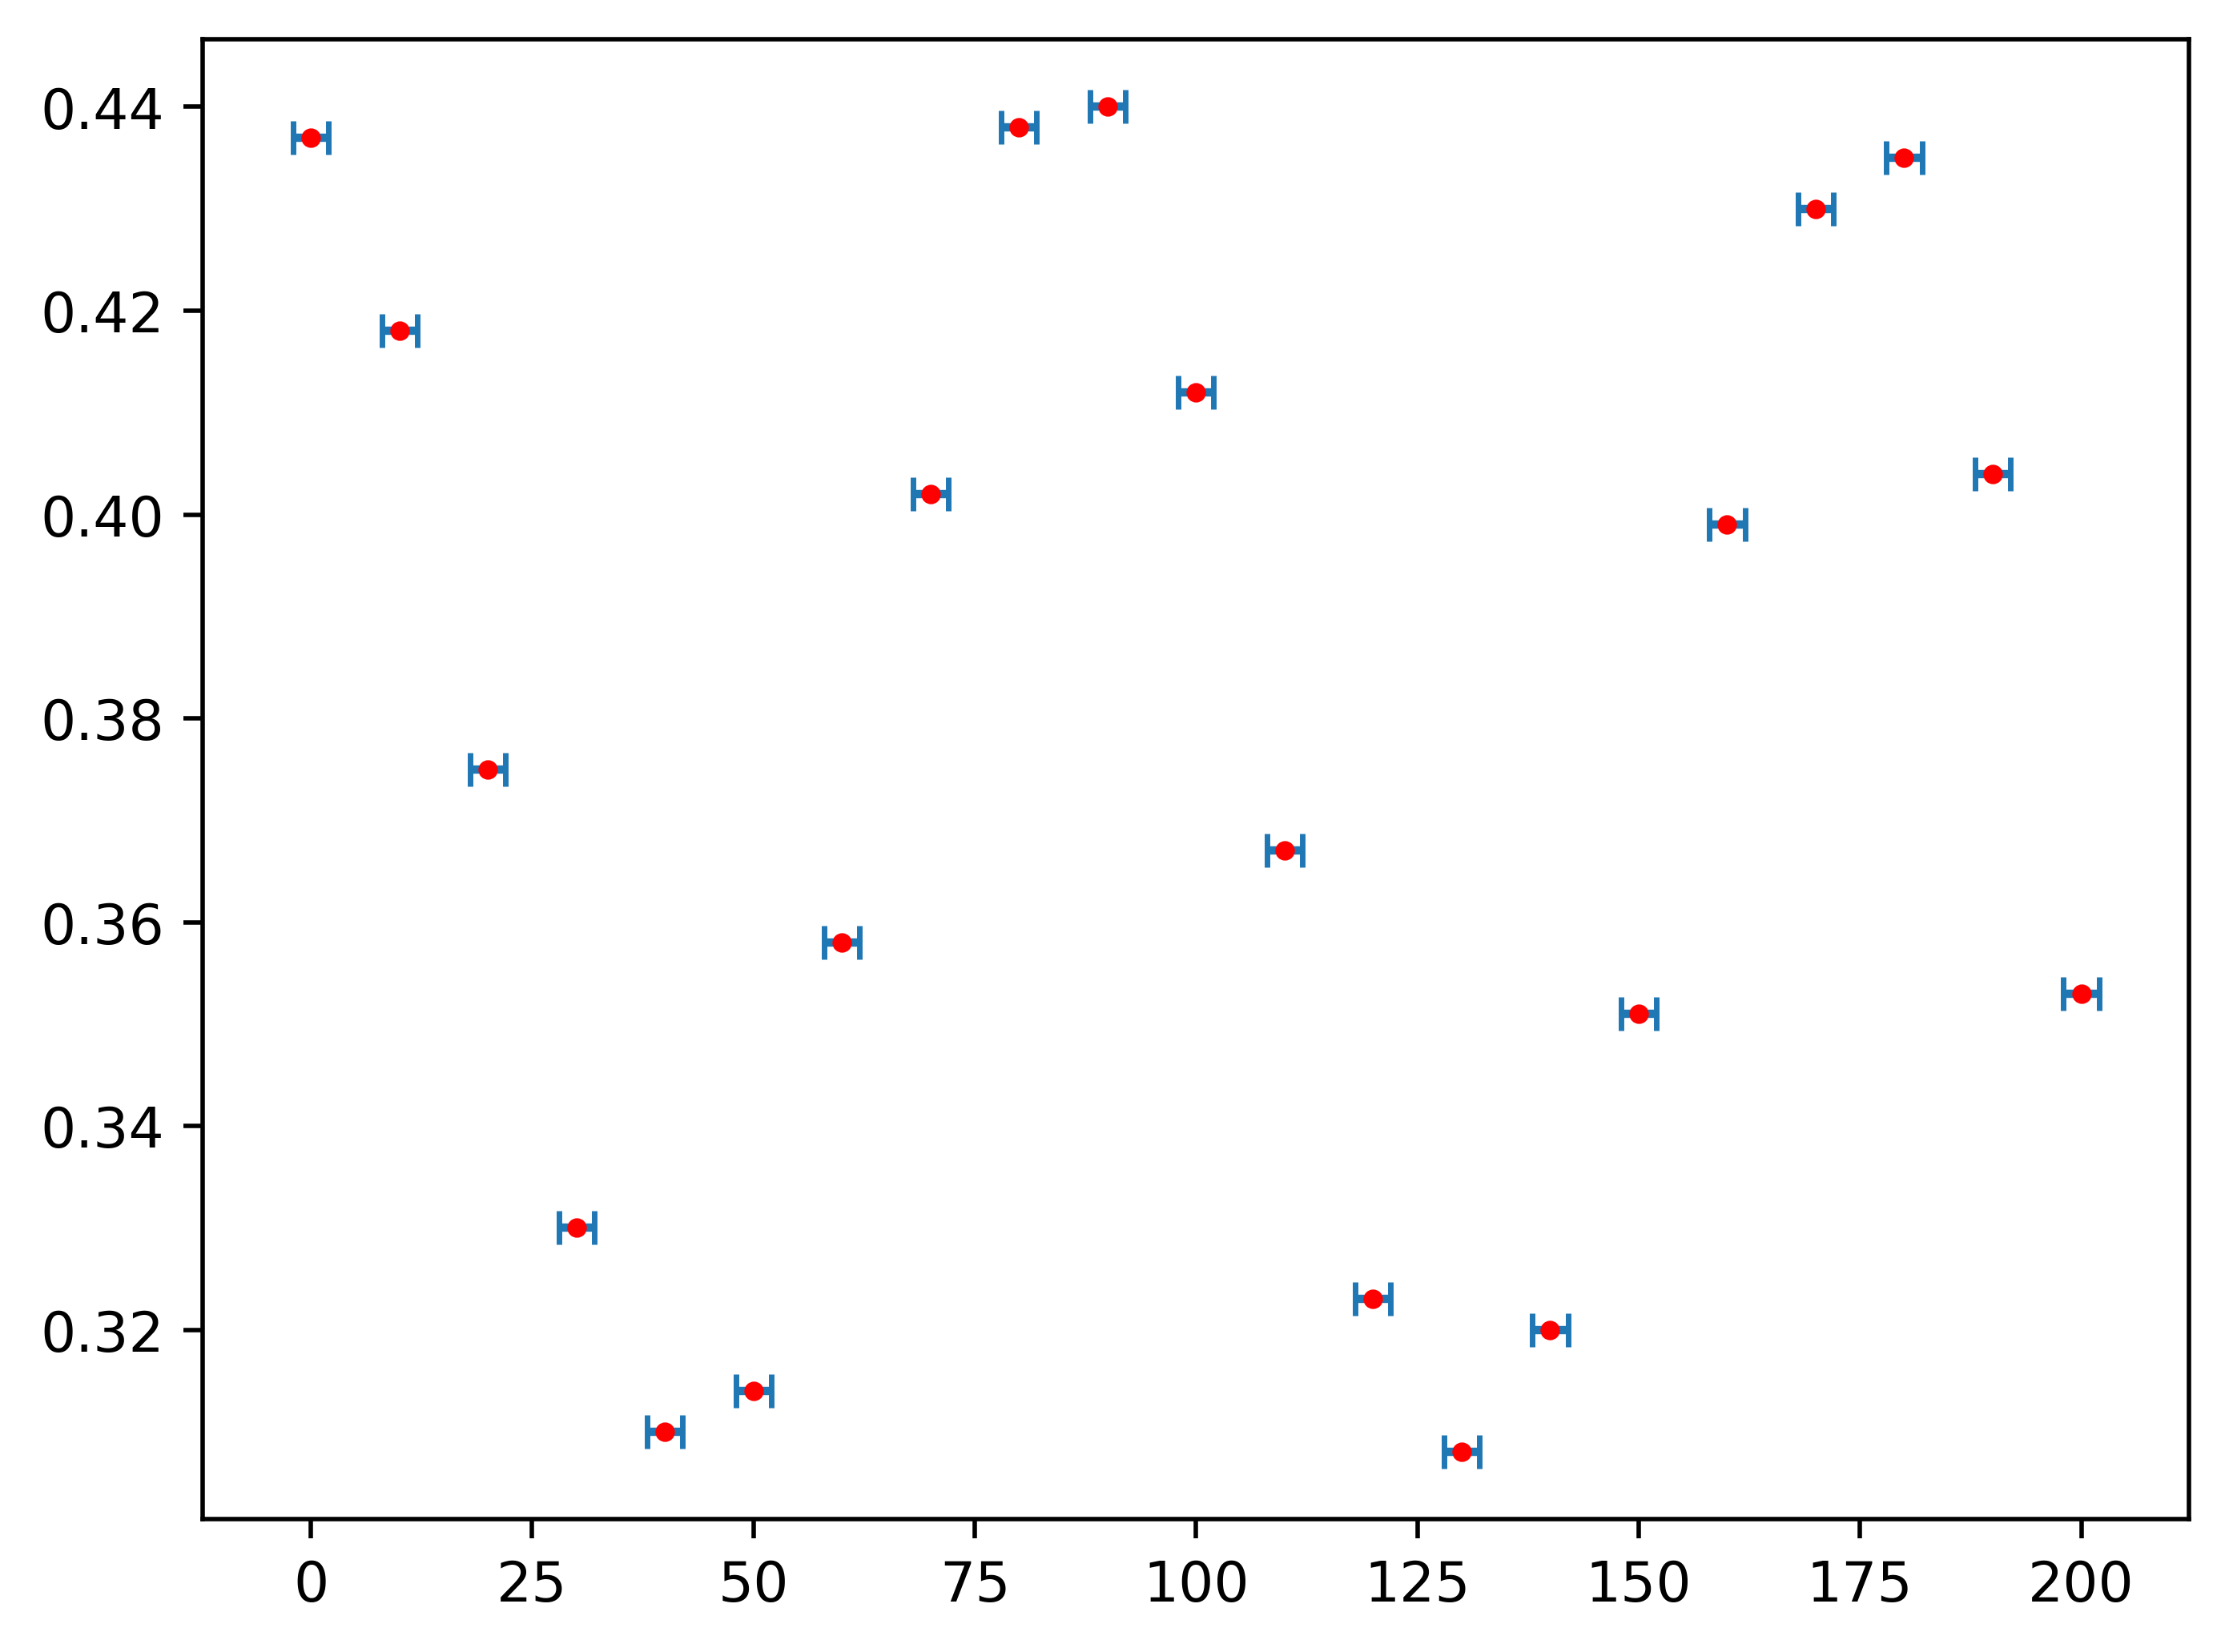

In [53]:
angle_arr = [x for x in range(0,210,10)]
Count_measurements = [0.437,0.418,0.375,0.33,0.31,0.314,0.358,0.402,0.438,0.44,0.412,0.367,0.323,0.308,0.32,0.351,0.399,0.43,0.435,0.404,0.353]

plt.scatter(angle_arr, Count_measurements, marker=".", s=25, color="r", zorder=5)
plt.errorbar(angle_arr, Count_measurements, xerr=[2], yerr=[0.000005], fmt=".", markersize=1, capsize=3)

information = f" P_i: {round(beam_pow*10**-OD_value,14)} W | # Input Rate {round(photons_per_second(beam_pow,OD_value)*10**(-6),4)} MHz"

legendtitle = ""
title = f'Count Rate - Angle dependency - Channel {channel}'
ylabel = 'Count Rate [MHz]'
xlabel = f'Rel. Angle to slow axis [deg]'
save_name = "HQO_2024011_countrate_angle_thesis"

# plott_settings_default("",xlabel, ylabel, name_for_saving=save_name)


81.65171898355754


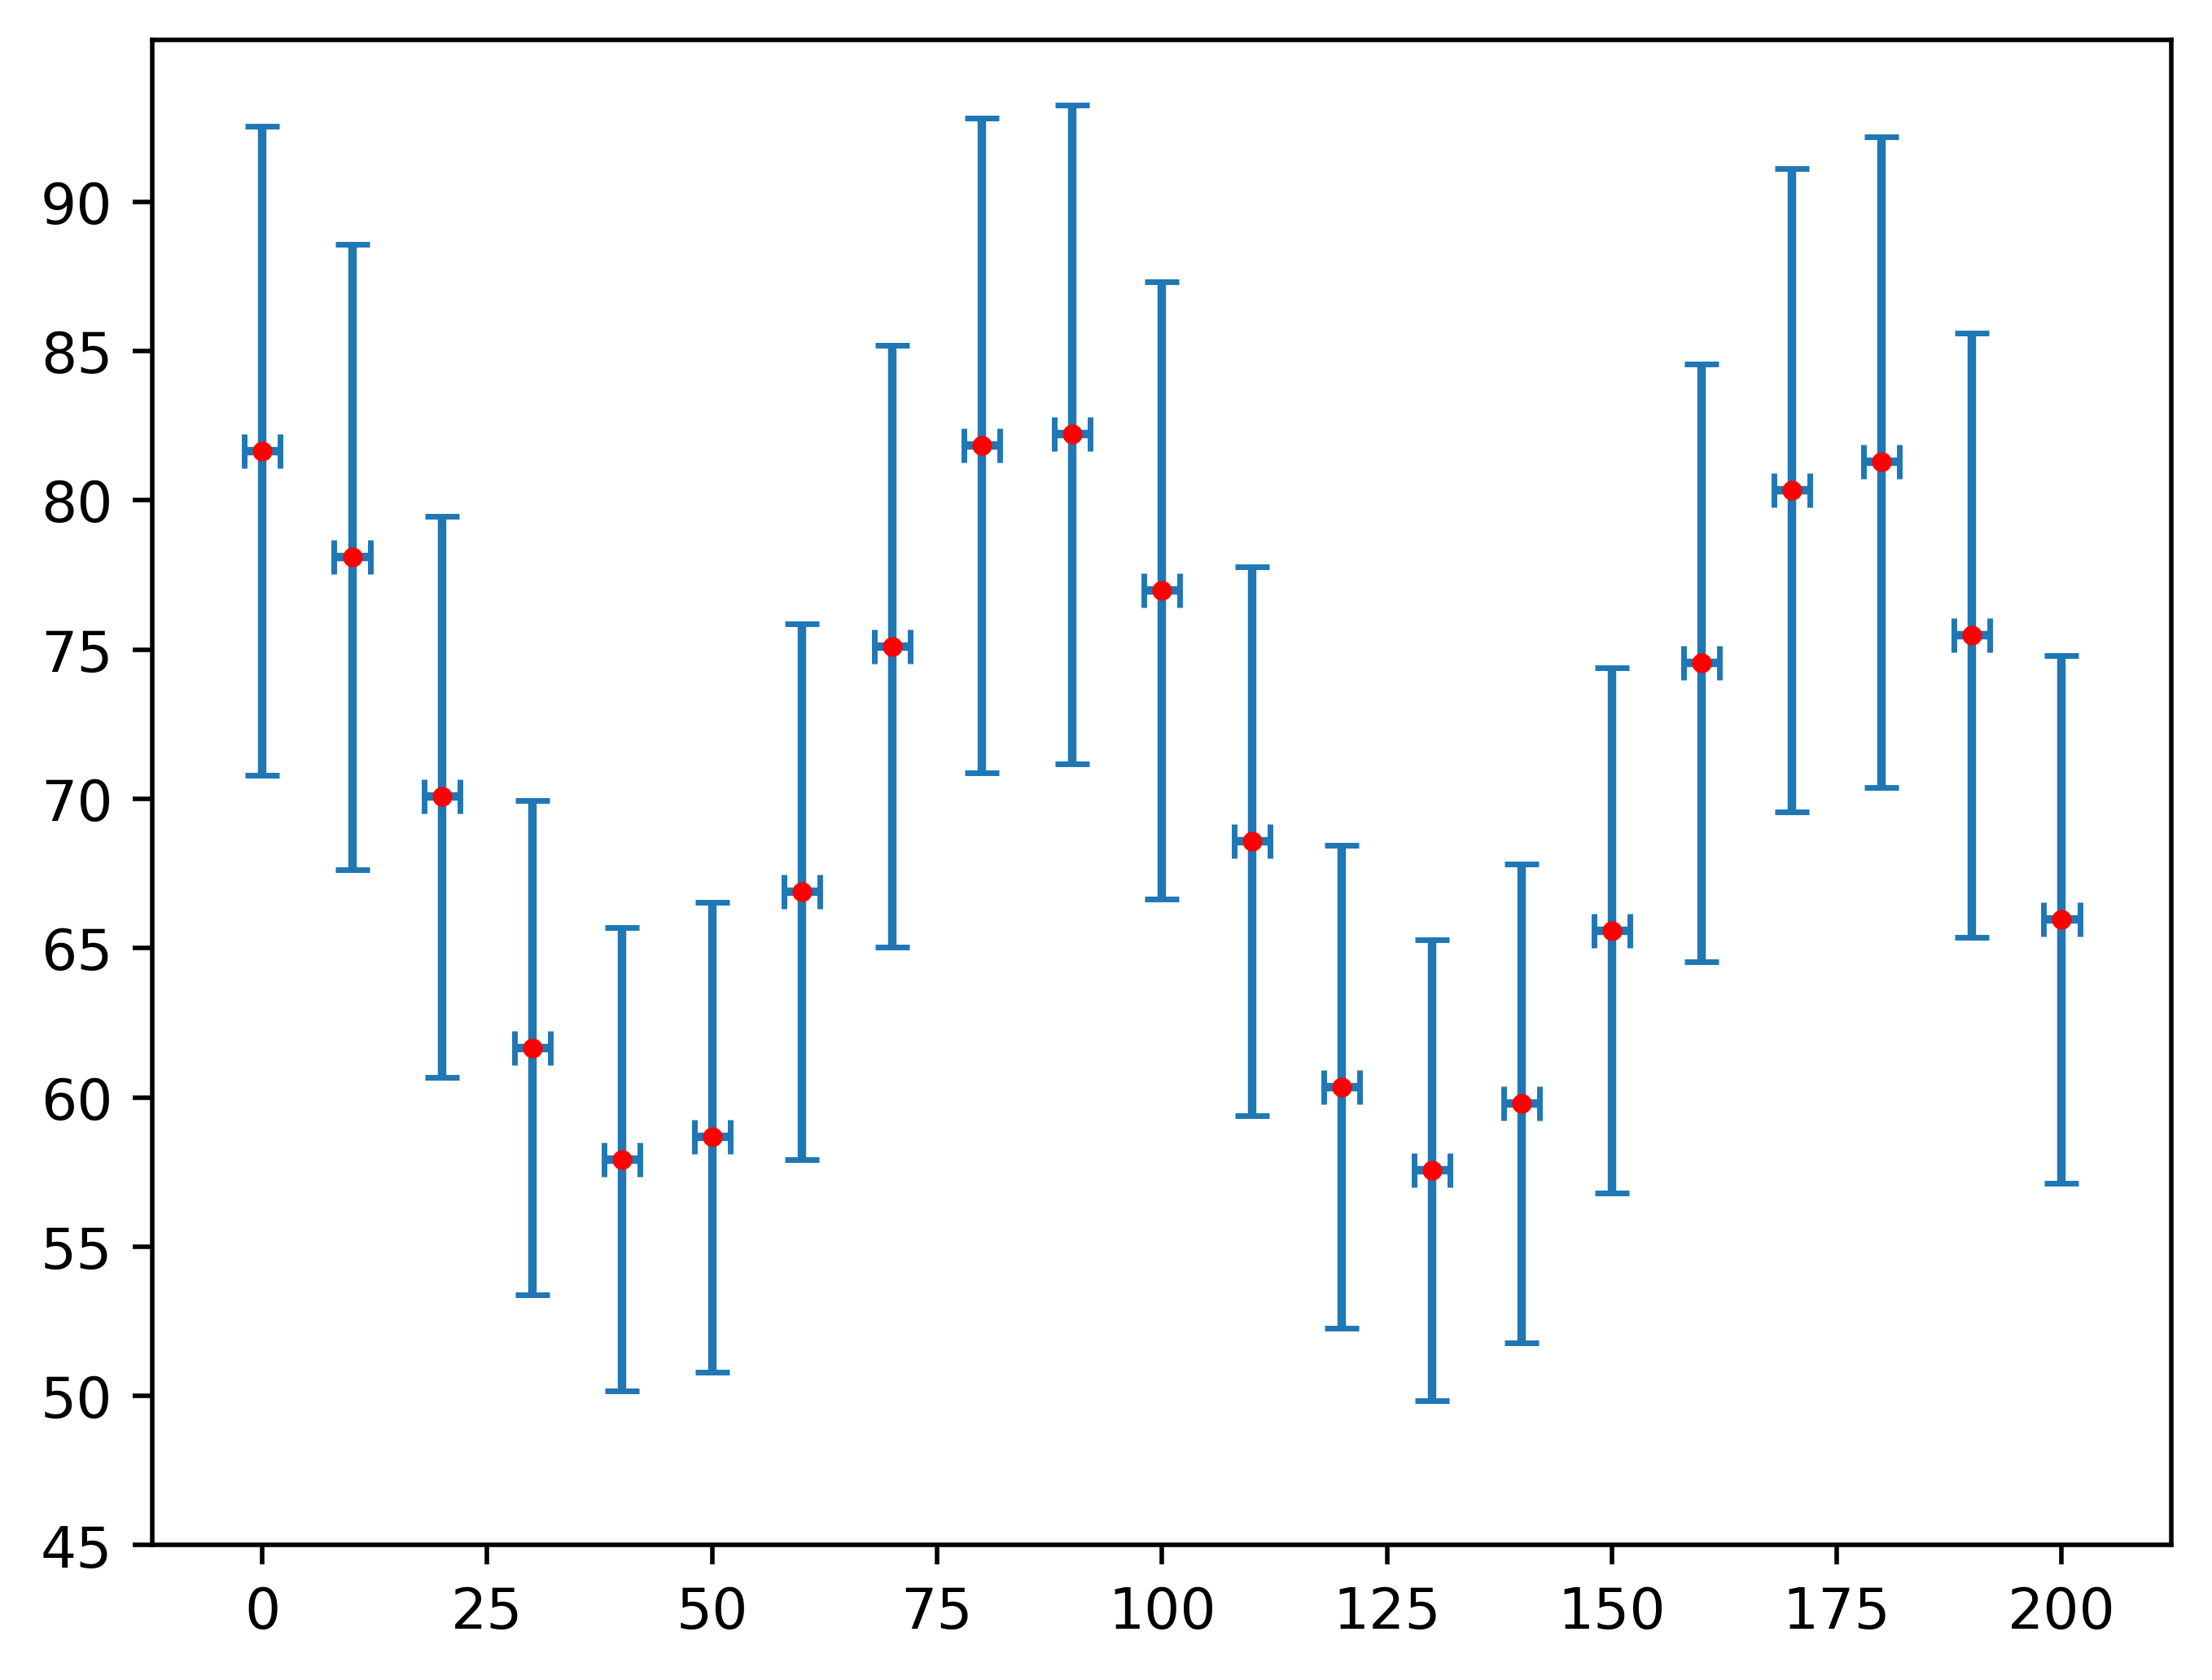

In [54]:
angle_arr = [x for x in range(0,210,10)]
sde_angle = np.array(Count_measurements)/round(photons_per_second(beam_pow,OD_value)*10**(-6),4) * 100

sde_errors = [10.872, 10.476, 9.398, 8.271, 7.769, 7.870, 8.972, 10.075, 10.977, 11.028, 10.326, 9.198, 8.095, 7.719, 8.020, 8.797, 10.000, 10.777, 10.902, 10.125, 8.847]

print(sde_angle[0])
plt.scatter(angle_arr, sde_angle, marker=".", s=25, color="r", zorder=5)
plt.errorbar(angle_arr, sde_angle, xerr=[2], yerr=sde_errors, fmt=".", markersize=1, capsize=3)

# - P_i: {round(beam_pow*10**-OD_value,14)} W | # Input Rate {round(photons_per_second(beam_pow,OD_value)*10**(-6),4)} MHz
title = f'SDE - Angle dependency - Channel {channel} '
ylabel = f'System Detection efficiency (SDE) [%]'
xlabel = f'Rel. Angle to slow axis [deg] '
plt.yticks(np.arange(45, 95, 5))
save_name = "HQO_2024011_sde_angle_thesis"

# plott_settings_default("",xlabel, ylabel,  name_for_saving=save_name)


In [56]:
# 2. Bias current - trigger voltage dependency
bias_tv_sde_all = os.listdir("/Users/maxim.re/sciebo/Ba_thesis_measurement_data")

# print(np.sort(bias_tv_sde_all))
homedir = "/Users/maxim.re/sciebo/Ba_thesis_measurement_data"

x_data = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-22-36_Bias_sweep_OD_9_15_tv_300mV.txt', skiprows=16, usecols=[0,9])

bias_sweep_9_15_300 = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-22-36_Bias_sweep_OD_9_15_tv_300mV.txt', skiprows=16, usecols=[0,9])
bias_sweep_9_15_500 = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-18-54_Bias_sweep_OD_9_15_tv_500mV.txt', skiprows=16, usecols=[0,9])
bias_sweep_9_15_750 = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-13-14_Bias_sweep_OD_9_15_tv_750mV.txt', skiprows=16, usecols=[0,9])
bias_sweep_9_15_1000 = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-26-46_Bias_sweep_OD_9_15_tv_1000mV.txt', skiprows=16, usecols=[0,9])


beam_pow = 511e-6
OD_value_1 = 9.15

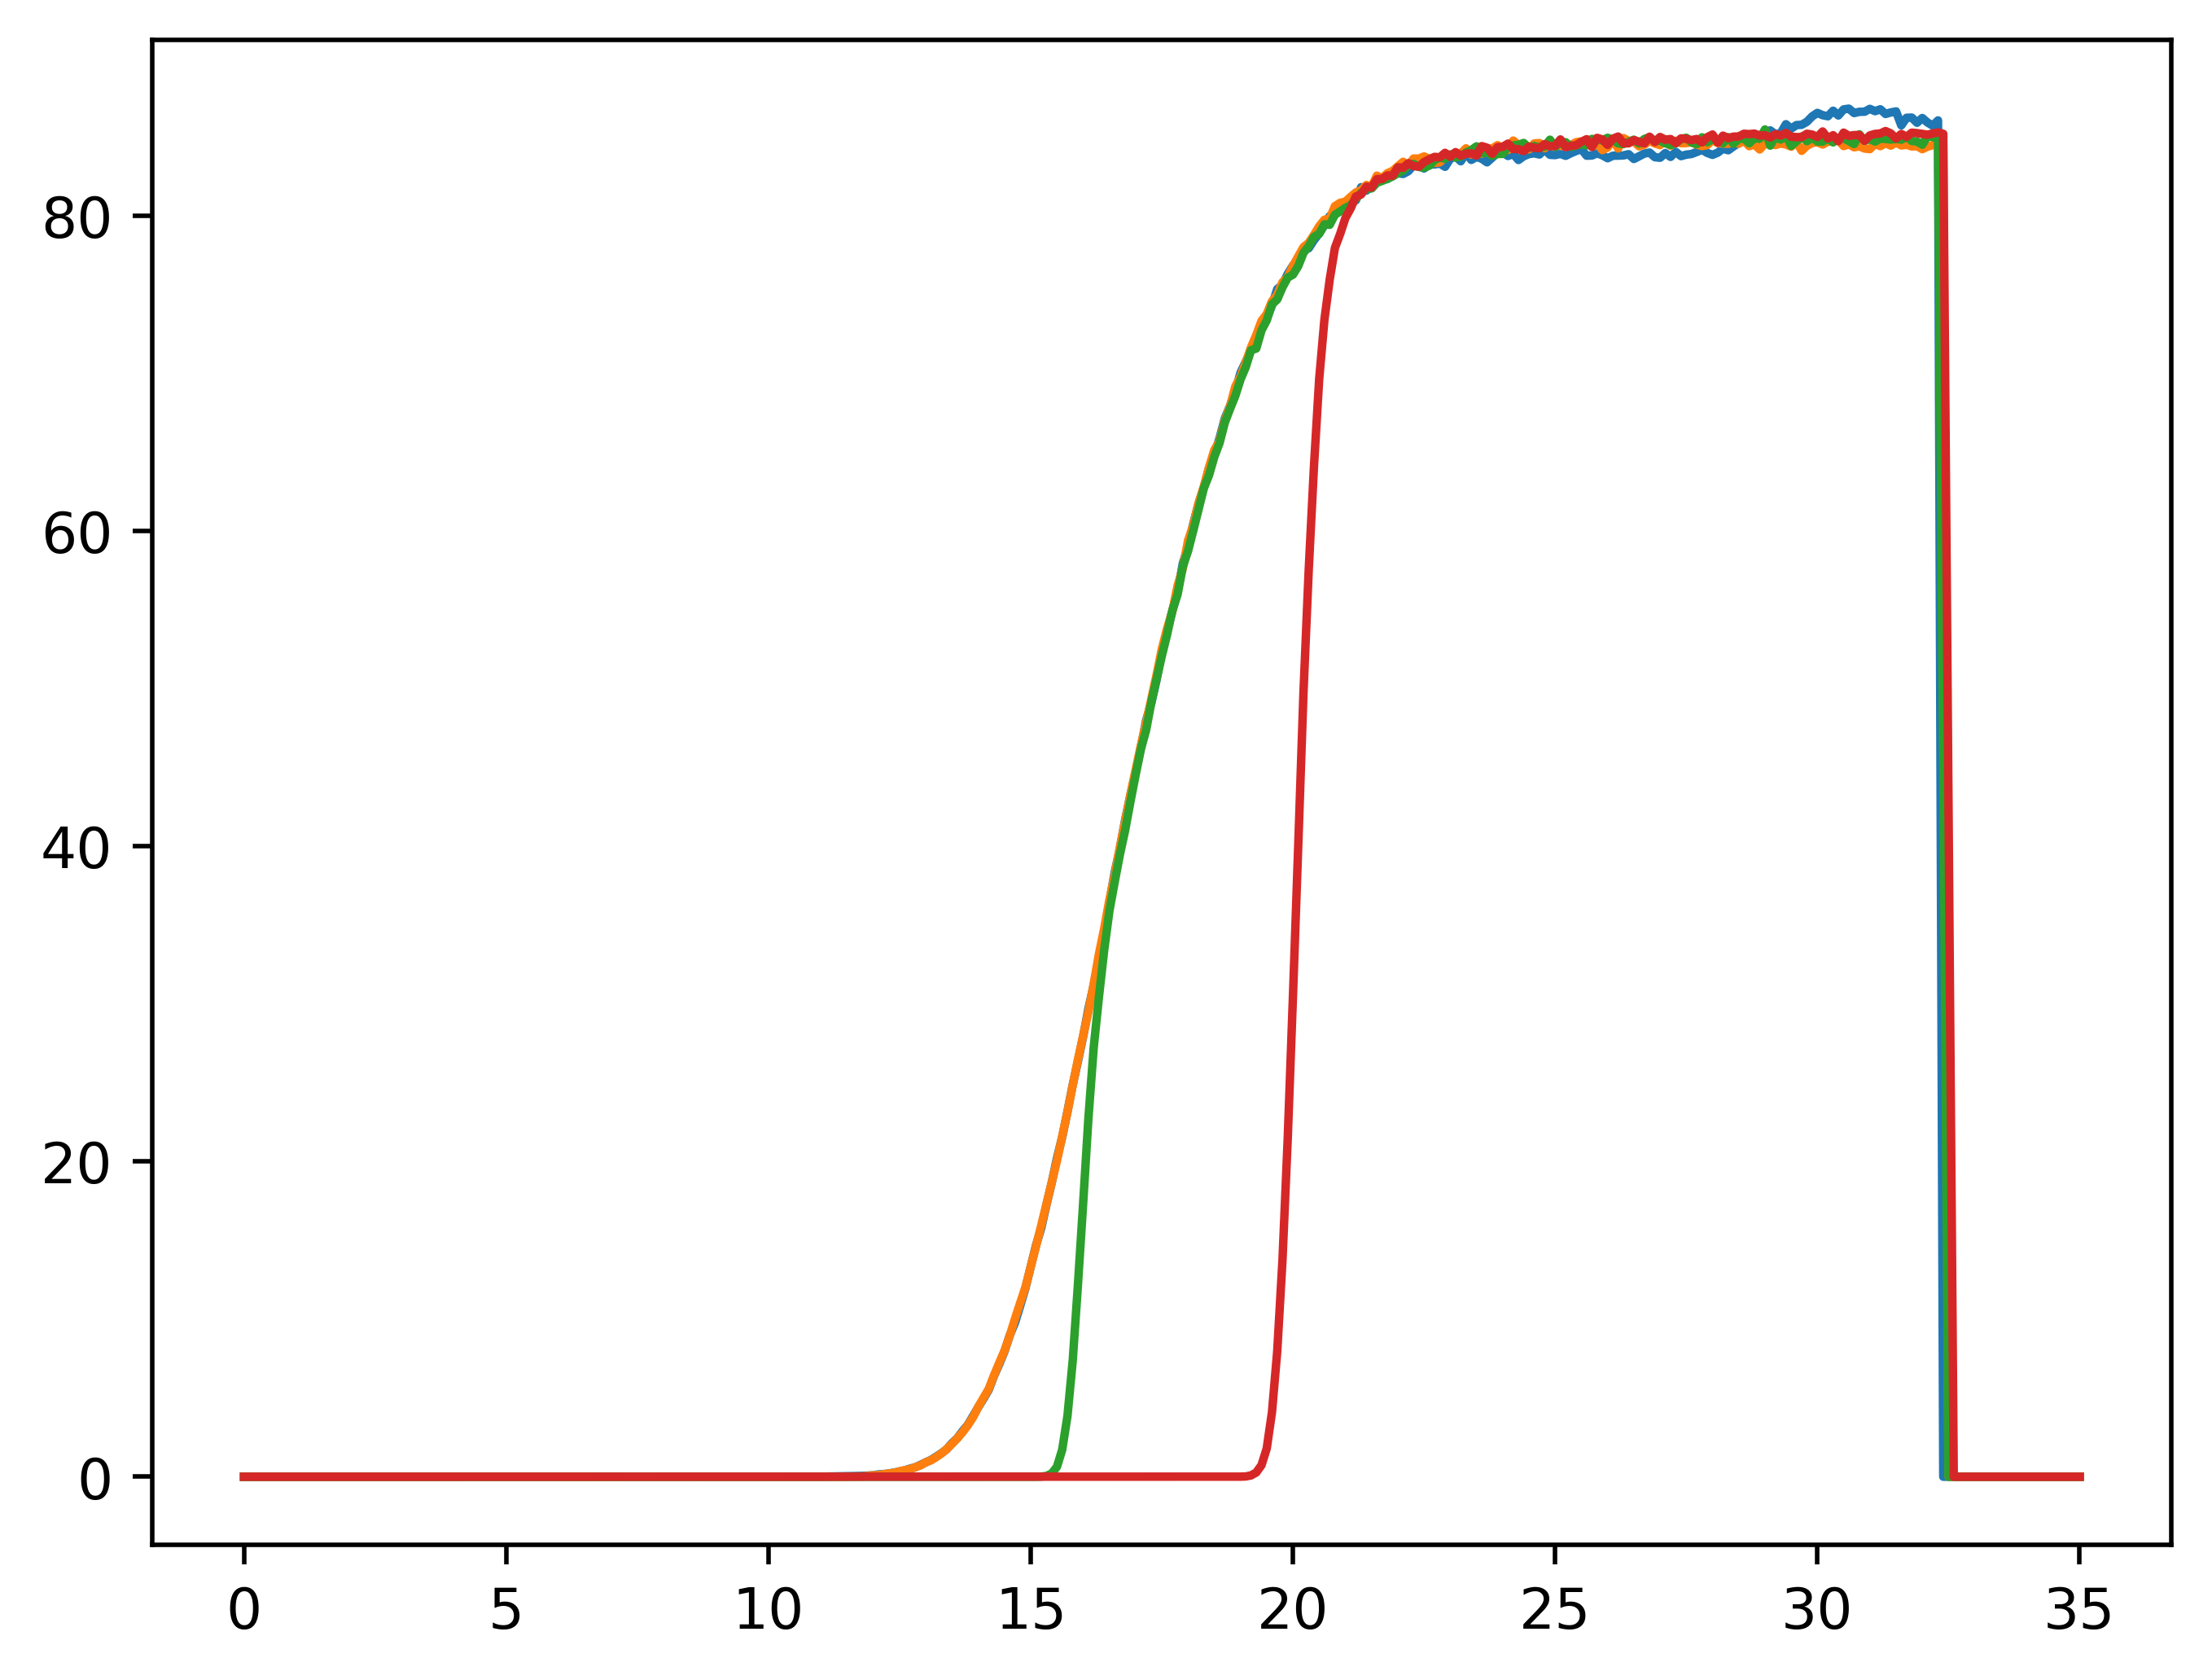

In [57]:
# Plotting
# plt.yticks(np.arange(0, 100, 5))

plt.plot(bias_sweep_9_15_300[:,0],(bias_sweep_9_15_300[:,1]*5/photons_per_second(beam_pow, OD_value_1))*100, label="300mV")
plt.plot(bias_sweep_9_15_500[:,0], (bias_sweep_9_15_500[:,1]*5/photons_per_second(beam_pow, OD_value_1))*100, label="500mV")
plt.plot(bias_sweep_9_15_750[:,0], (bias_sweep_9_15_750[:,1]*5/photons_per_second(beam_pow, OD_value_1))*100, label="750mV")
plt.plot(bias_sweep_9_15_1000[:,0], (bias_sweep_9_15_1000[:,1]*5/photons_per_second(beam_pow, OD_value_1))*100, label="1000mV")

title = f'SDE vs. Bias current - Channel {channel}'
ylabel = f'System Detection efficiency (SDE) [%]'
xlabel = f'Bias current [uA] '
save_name = "HQO_20240711_sde_bias_current_tv_300_1000_thesis"

# plott_settings_default("Input rate 1.396 MHz", xlabel, ylabel, name_for_saving=save_name, legend_title="Trigger voltage", subtitle=title)
# plott_settings_default("", xlabel, ylabel, name_for_saving=save_name, legend_title="Trigger voltage")


In [58]:
# 3. OD - Efficiency calculation - channel 1 
bias_tv_sde_all = os.listdir("/Users/maxim.re/sciebo/Ba_thesis_measurement_data")

# print(np.sort(bias_tv_sde_all))
homedir = "/Users/maxim.re/sciebo/Ba_thesis_measurement_data"

x_data = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-13-14_Bias_sweep_OD_9_15_tv_750mV.txt', skiprows=16, usecols=[0,9])

bias_sweep_9_58_750 = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-35-56_Bias_sweep_OD_9_58_tv_750mV.txt', skiprows=16, usecols=[0,9])
bias_sweep_8_08_750 = np.loadtxt(f'{homedir}/HQO__2024-06-28--15-49-01_Bias_sweep_OD_8_0840_tv_750mV.txt', skiprows=16, usecols=[0,9])
bias_sweep_8_32_750 = np.loadtxt(f'{homedir}/HQO__2024-06-28--16-05-58_Bias_sweep_OD_8_32_tv_750mV.txt', skiprows=16, usecols=[0,9])
bias_sweep_7_65_750 = np.loadtxt(f'{homedir}/HQO__2024-06-28--15-39-01_Bias_sweep_OD_7.6598_tv_750mV.txt', skiprows=16, usecols=[0,9])

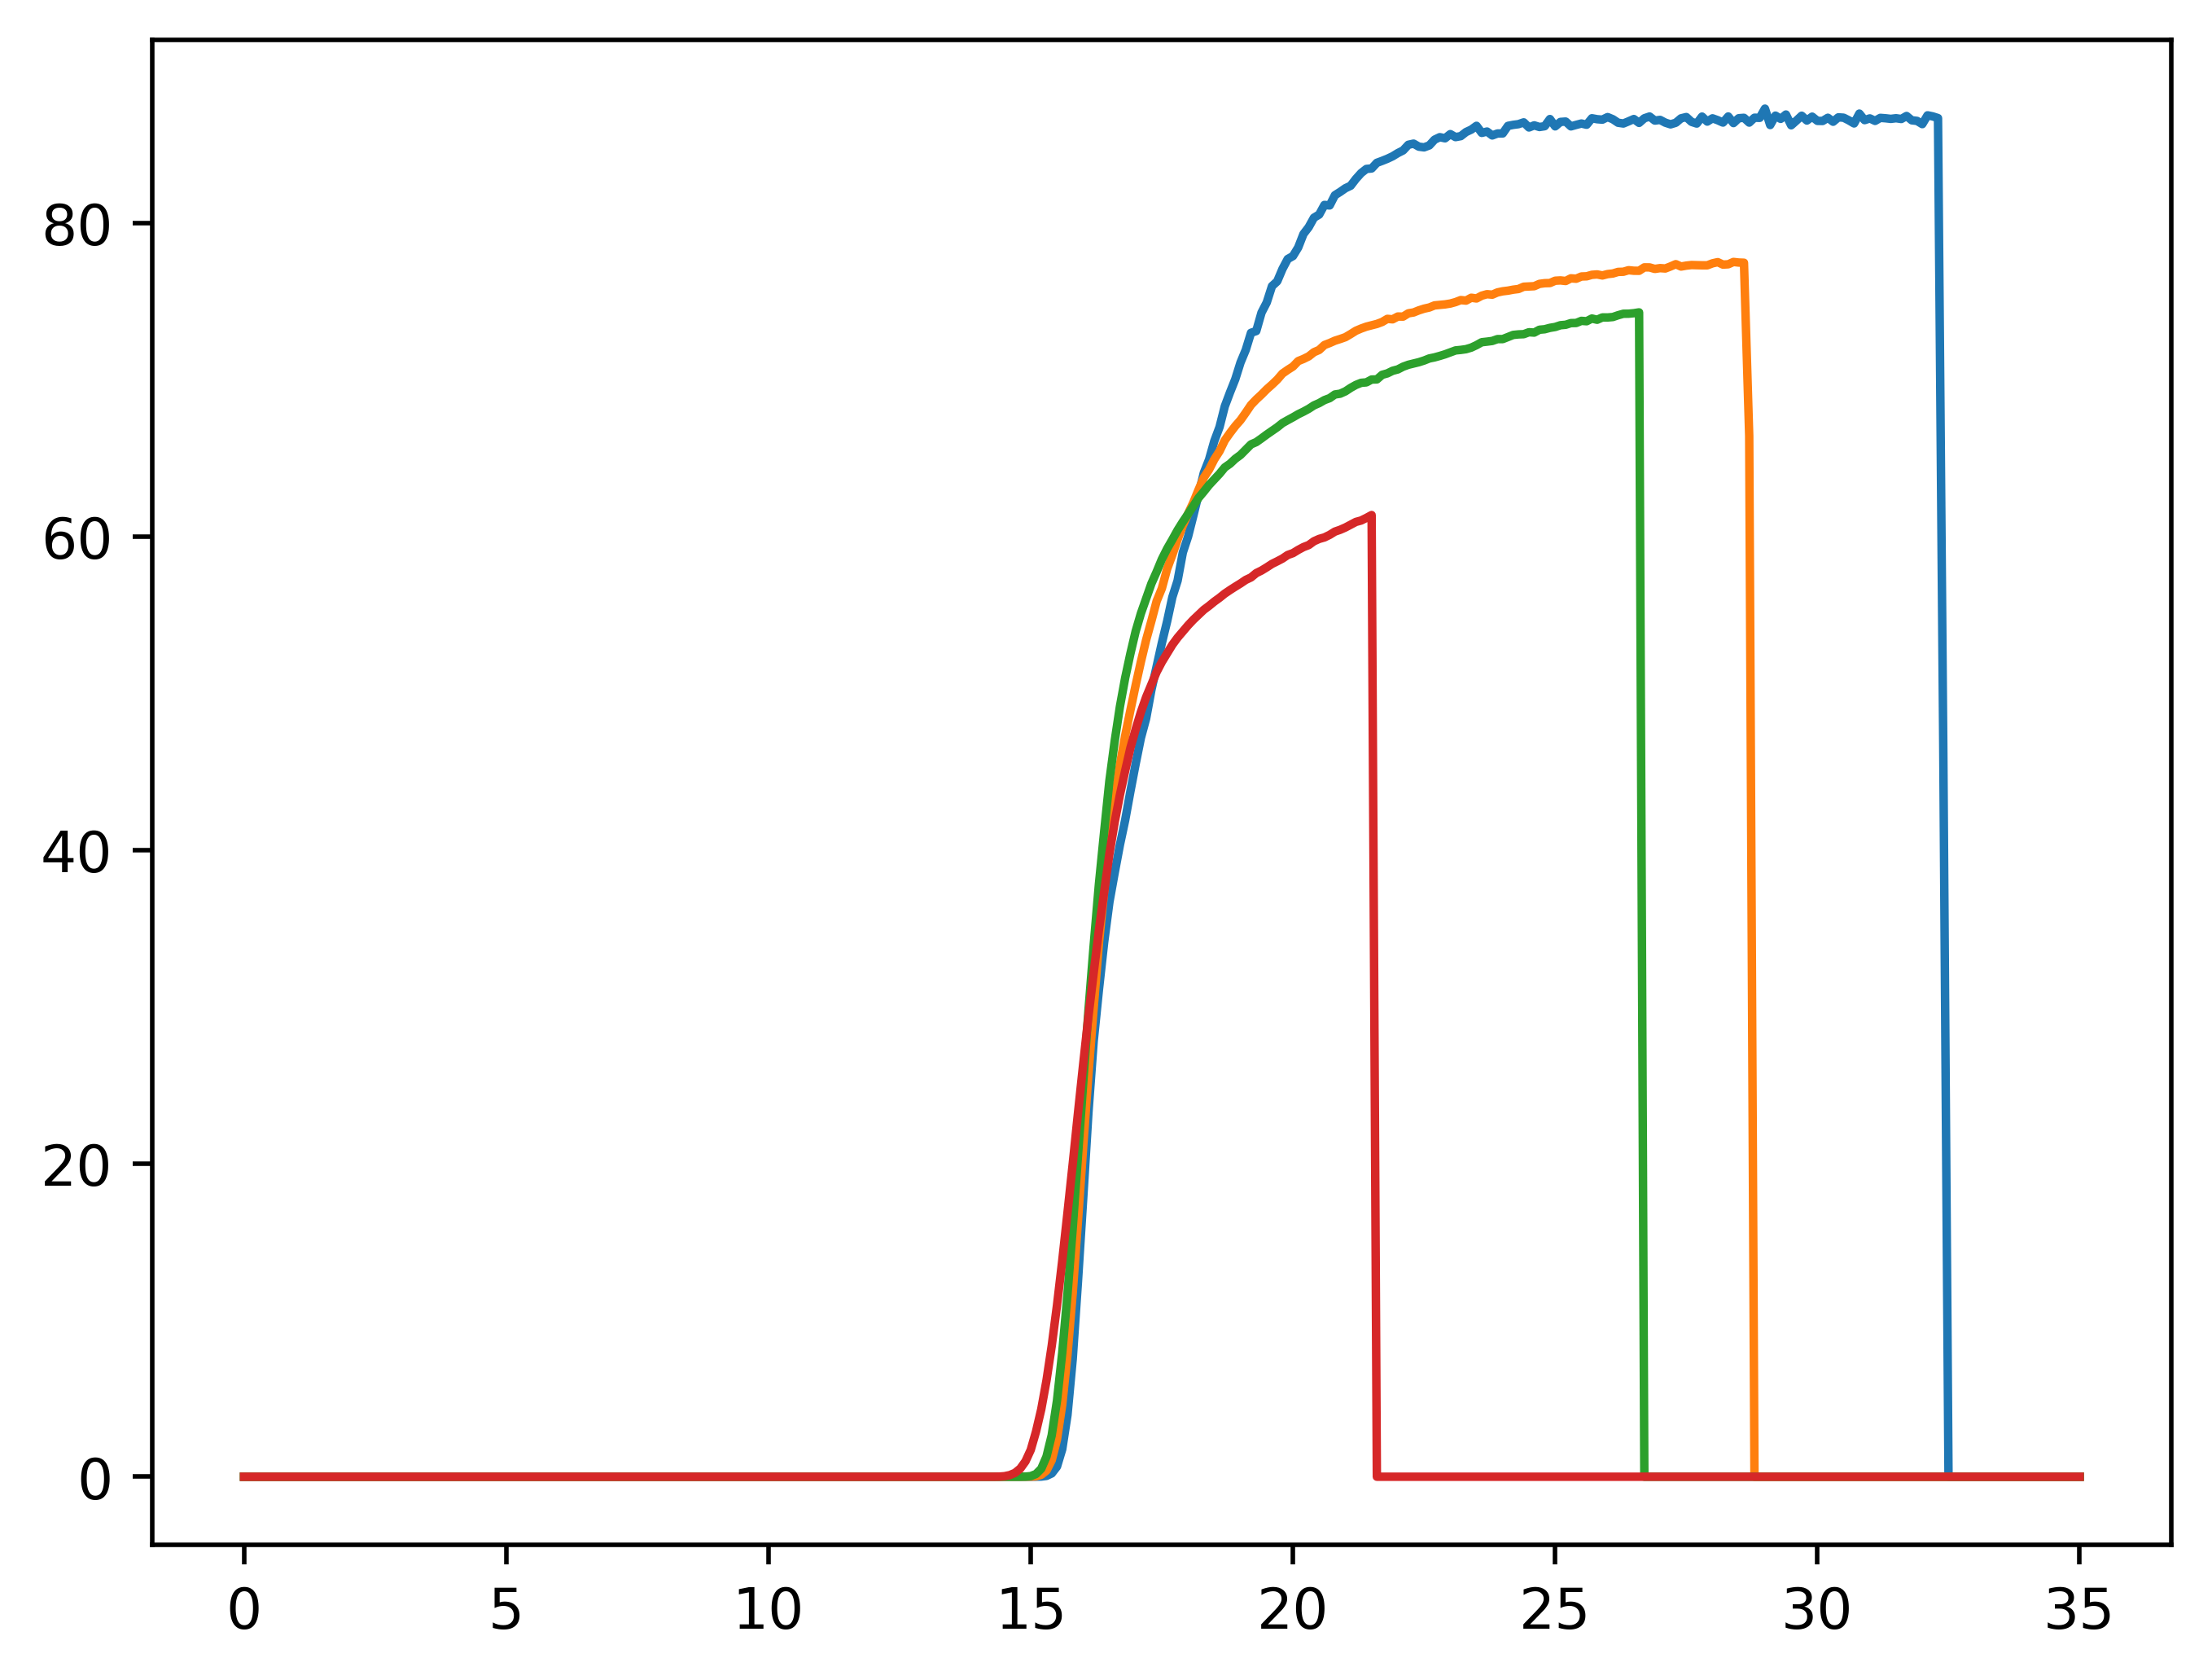

In [154]:
# Plotting

OD_9_58 = 9.5834
OD_9_15 = 9.1591
OD_8_32 = 8.3273
OD_8_08 = 8.0840
OD_7_65 = 7.6598
OD_7_48 = 7.48
OD_9_72 = 9.72
OD_10_48 = 10.48
OD_12_06 = 12.06
OD_8_92 = 8.92
OD_11_22 = 11.22

delta_OD_9_58 = 0.1054
delta_OD_9_15 = 0.1049
delta_OD_8_32 = 0.1035
delta_OD_8_08 = 0.0567
delta_OD_7_65 = 0.1008
delta_OD_7_48 = 0.1009
delta_OD_9_72 = 0.104
delta_OD_11_22 = 0.106 
delta_OD_10_48 = 0.1052
delta_OD_12_06 = 0.1135
delta_OD_8_92 = 0.0568


def error_function_sde(beam_power, OD_value, OD_error, measured_photonrate):
    """Error calculation for SDE measurement
    Args:
        beam_power (float): Beam power in W
        OD_value (float): Optical density value for the measurement
        OD_error (float): Error of the OD value
        measured_photonrate (float): Measured photon rate in MHz
        Returns:
                [float]: Error of the SDE measurement"""  
    
    measurement_uncertainty = 10**(-OD_value)*0.03*beam_power
    output_error_power = np.sqrt((10**(-OD_value) * measurement_uncertainty)**2 + (10**(-OD_value) * beam_power * np.log10(10) * OD_error)**2)
    output_error_frequency = output_error_power/(hbar * omega_IR)
    return np.sqrt((measured_photonrate/photons_per_second(beam_power, OD_value)**2 * output_error_frequency)**2) 

bias_sweep_test = np.loadtxt(f'Bias Sweep Variable OD/HQO__2024-06-27--09-24-53_Bias_sweep_OD_9.57_tv_300mV.txt', skiprows=16, usecols=[0,9])

plt.plot(bias_sweep_9_15_750[:,0], 100*bias_sweep_9_15_750[:,1]*5/photons_per_second(beam_pow, OD_9_15), label=f"{round(photons_per_second(beam_pow, OD_9_15) *10**(-6),3)}")
plt.plot(bias_sweep_8_32_750[:,0], 100*bias_sweep_8_32_750[:,1]*5/photons_per_second(beam_pow, OD_8_32), label=f"{round(photons_per_second(beam_pow, OD_8_32) *10**(-6),3)}")
plt.plot(bias_sweep_8_08_750[:,0], 100*bias_sweep_8_08_750[:,1]*5/photons_per_second(beam_pow, OD_8_08), label=f"{round(photons_per_second(beam_pow, OD_8_08) *10**(-6),3)}")
plt.plot(bias_sweep_7_65_750[:,0], 100*bias_sweep_7_65_750[:,1]*5/photons_per_second(beam_pow, OD_7_65), label=f"{round(photons_per_second(beam_pow, OD_7_65) *10**(-6),3)}")

title = f'SDE vs. Bias current - Channel {channel} - trigger voltage 750mV'
ylabel = f'System Detection efficiency (SDE) [%]'
xlabel = f'Bias current [uA] '
save_name = "HQO_20240711_sde_bias_current_750_thesis"

# plott_settings_default("", xlabel, ylabel, name_for_saving=save_name, legend_title="Photons per second [MHz]")

In [61]:
# 4. Photon rate dependent - Efficiency calculation - channel 1 
maxima_arr = np.array([np.max(bias_sweep_9_15_750[:,1]*5/photons_per_second(beam_pow, OD_9_15)),
np.max(bias_sweep_8_32_750[:,1]*5/photons_per_second(beam_pow, OD_8_32)),
np.max(bias_sweep_8_08_750[:,1]*5/photons_per_second(beam_pow, OD_8_08)),
np.max(bias_sweep_7_65_750[:,1]*5/photons_per_second(beam_pow, OD_7_65))])

error_arr_sde = np.array([error_function_sde(beam_pow, OD_9_15,delta_OD_9_15, np.max(bias_sweep_9_15_750[:,1]*5)),error_function_sde(beam_pow, OD_8_32,delta_OD_8_32, np.max(bias_sweep_8_32_750[:,1]*5)),error_function_sde(beam_pow, OD_8_08,delta_OD_8_08, np.max(bias_sweep_8_08_750[:,1]*5)),error_function_sde(beam_pow, OD_7_65,delta_OD_7_65, np.max(bias_sweep_7_65_750[:,1]*5))])

photon_counts = np.array([round(photons_per_second(beam_pow, OD_9_15) *10**(-6),3),round(photons_per_second(beam_pow, OD_8_32) *10**(-6),3),round(photons_per_second(beam_pow, OD_8_08) *10**(-6),3),round(photons_per_second(beam_pow, OD_7_65) *10**(-6),3)])

0.8730862689700405
0.0915867496149572


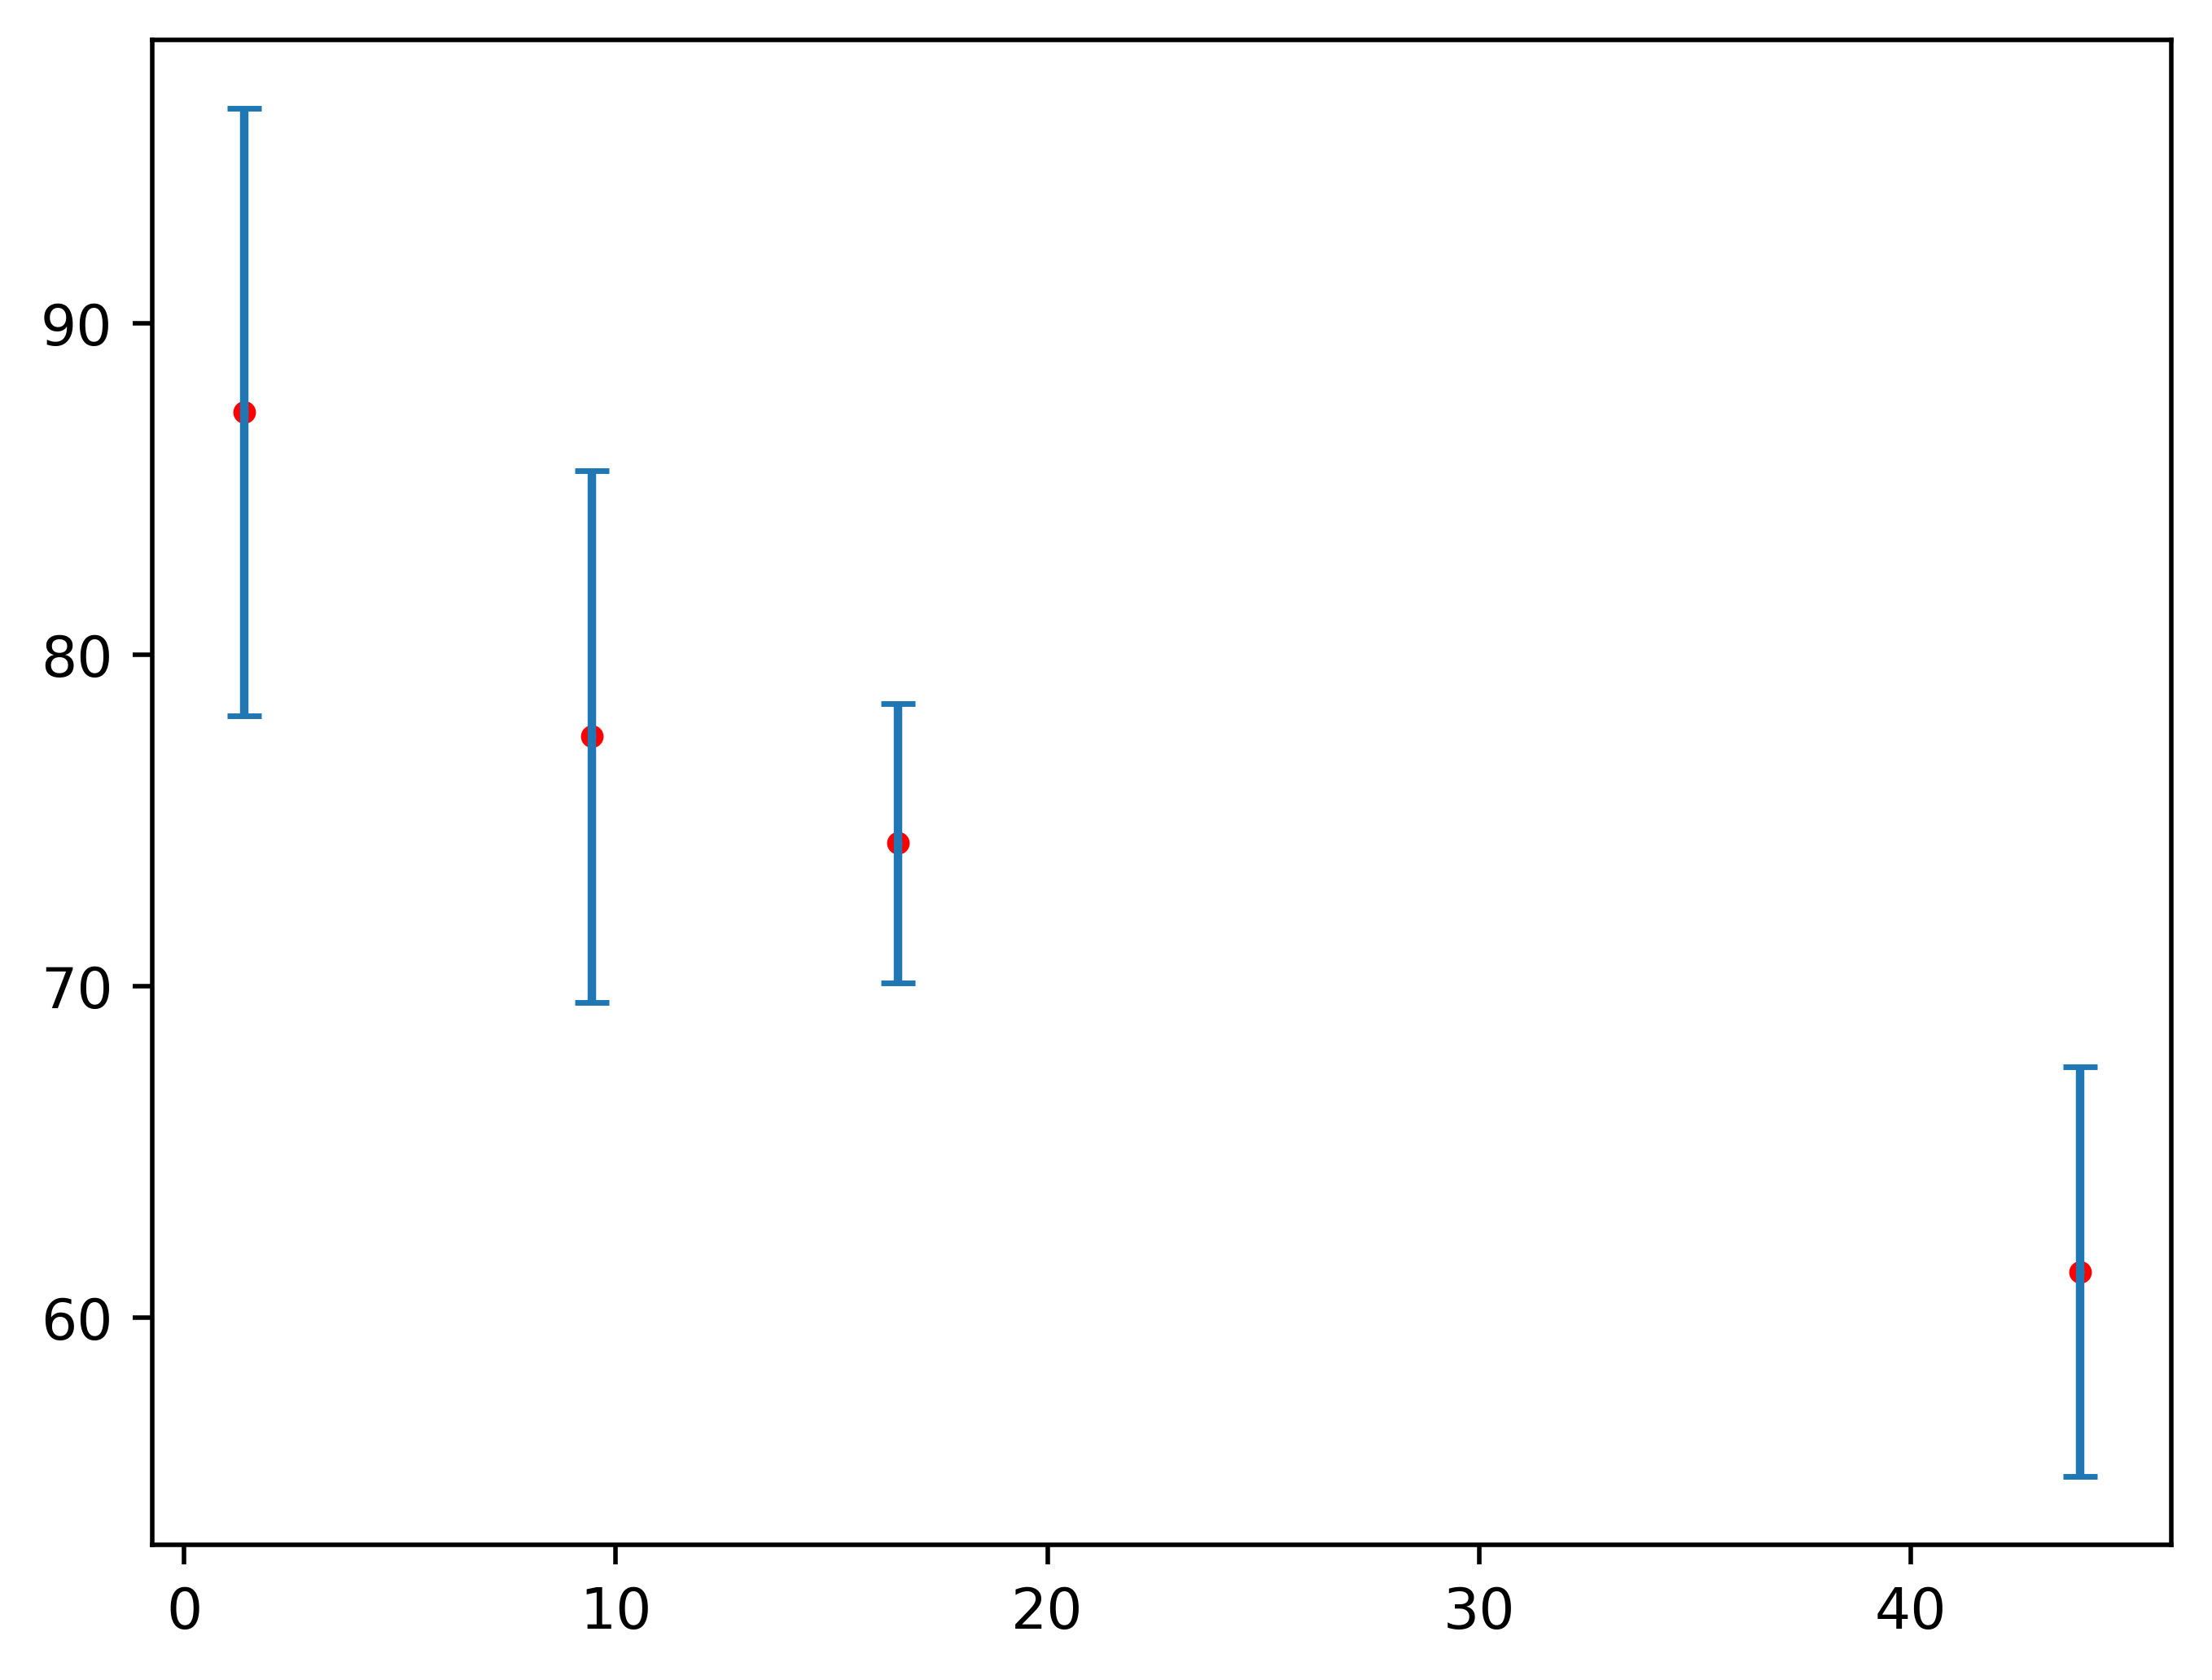

In [62]:
# plotting - photon rate vs. SDE
print(maxima_arr[0])
print(error_arr_sde[0])
plt.scatter(photon_counts, 100*maxima_arr, marker=".", color="r", label="Channel 1")
plt.errorbar(photon_counts, 100*maxima_arr, yerr=100*error_arr_sde, fmt=".", markersize=1, capsize=3)
title = f'SDE vs. Photon rate - Channel {channel} - trigger voltage 750mV'
ylabel = f'System Detection efficiency (SDE) [%]'
xlabel = f'Photon rate [MHz] '
save_name = "HQO_20240711_sde_photon_rate_750_thesis"

# plott_settings_default("", xlabel, ylabel, name_for_saving=save_name)

In [6]:
# Two photon events probability calculation

# Average photon rate error 
Photon_rate_a = 67.078 * 10**6
Delta_Photon_rate_a = 6.771 * 10**6
Photon_rate_b = 9.594 * 10**6
Delta_Photon_rate_b = 0.993 * 10**6

# Define constants
def calculate_photon_avg_number_error(Photon_rate, Delta_Photon_rate):
    A = Delta_Photon_rate * (4.185 / (3 * 10**8))
    B = Photon_rate  * (0.015 / (3 * 10**8))
    return math.sqrt(A**2 + B**2)

delta_photon_avg_a = calculate_photon_avg_number_error(Photon_rate_a, Delta_Photon_rate_a)
delta_photon_avg_b = calculate_photon_avg_number_error(Photon_rate_b, Delta_Photon_rate_b)

print(round(delta_photon_avg_a,3))
print(round(delta_photon_avg_b,3))

0.095
0.014


In [68]:
 # Bias sweep for different trigger voltages and photon rates 
homedir = os.listdir("./System detection efficiency/Bias Sweep")

def get_list_by_tv(file_list, bias): 
    bias_list = list(filter(lambda k: str(bias) + "mV" in k, file_list))
    return bias_list


In [90]:
get_list_by_tv(homedir, 300)
get_list_by_tv(homedir, 600)
get_list_by_tv(homedir, 900)
print(get_list_by_tv(homedir, 300))

bias_sweep_9_58_300 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 300)[7]}", skiprows=16, usecols=[0,9])
bias_sweep_7_48_300 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 300)[0]}", skiprows=16, usecols=[0,9])
bias_sweep_9_72_300 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 300)[3]}", skiprows=16, usecols=[0,9])
bias_sweep_10_48_300 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 300)[4]}", skiprows=16, usecols=[0,9])
bias_sweep_12_06_300 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 300)[5]}", skiprows=16, usecols=[0,9])
bias_sweep_8_92_300 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 300)[6]}", skiprows=16, usecols=[0,9])
bias_sweep_8_32_300 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 300)[2]}", skiprows=16, usecols=[0,9])
bias_sweep_11_22_300 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 300)[8]}", skiprows=16, usecols=[0,9])

bias_sweep_9_58_600 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 600)[6]}", skiprows=16, usecols=[0,9])
bias_sweep_7_48_600 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 600)[2]}", skiprows=16, usecols=[0,9])
bias_sweep_9_72_600 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 600)[1]}", skiprows=16, usecols=[0,9])
bias_sweep_10_48_600 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 600)[0]}", skiprows=16, usecols=[0,9])
bias_sweep_12_06_600 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 600)[4]}", skiprows=16, usecols=[0,9])
bias_sweep_8_92_600 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 600)[5]}", skiprows=16, usecols=[0,9])
bias_sweep_8_32_600 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 600)[3]}", skiprows=16, usecols=[0,9])
bias_sweep_11_22_600 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 600)[7]}", skiprows=16, usecols=[0,9])

bias_sweep_9_58_900 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 900)[7]}", skiprows=16, usecols=[0,9])
bias_sweep_7_48_900 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 900)[1]}", skiprows=16, usecols=[0,9])
bias_sweep_9_72_900 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 900)[5]}", skiprows=16, usecols=[0,9])
bias_sweep_10_48_900 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 900)[6]}", skiprows=16, usecols=[0,9])
bias_sweep_12_06_900 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 900)[2]}", skiprows=16, usecols=[0,9])
bias_sweep_8_92_900 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 900)[4]}", skiprows=16, usecols=[0,9])
bias_sweep_8_32_900 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 900)[0]}", skiprows=16, usecols=[0,9])
bias_sweep_11_22_900 = np.loadtxt(f"./System detection efficiency/Bias Sweep/{get_list_by_tv(homedir, 900)[3]}", skiprows=16, usecols=[0,9])


['HQO__2024-07-24--11-17-07_Bias_sweep_OD_07_48_tv_300mV.txt', 'HQO__2024-07-24--07-50-12_Bias_sweep_OD_9_58_tv_300mV.txt', 'HQO__2024-07-24--11-47-57_Bias_sweep_OD_08_32_tv_300mV.txt', 'HQO__2024-07-24--13-00-35_Bias_sweep_OD_9_7266_tv_300mV.txt', 'HQO__2024-07-24--11-59-24_Bias_sweep_OD_10_48_tv_300mV.txt', 'HQO__2024-07-24--14-49-26_Bias_sweep_OD_12_06_tv_300mV.txt', 'HQO__2024-07-24--13-41-12_Bias_sweep_OD_8_9289_tv_300mV.txt', 'HQO__2024-07-24--11-08-13_Bias_sweep_OD_09_58_tv_300mV.txt', 'HQO__2024-07-24--10-35-16_Bias_sweep_OD_11_22_tv_300mV.txt']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


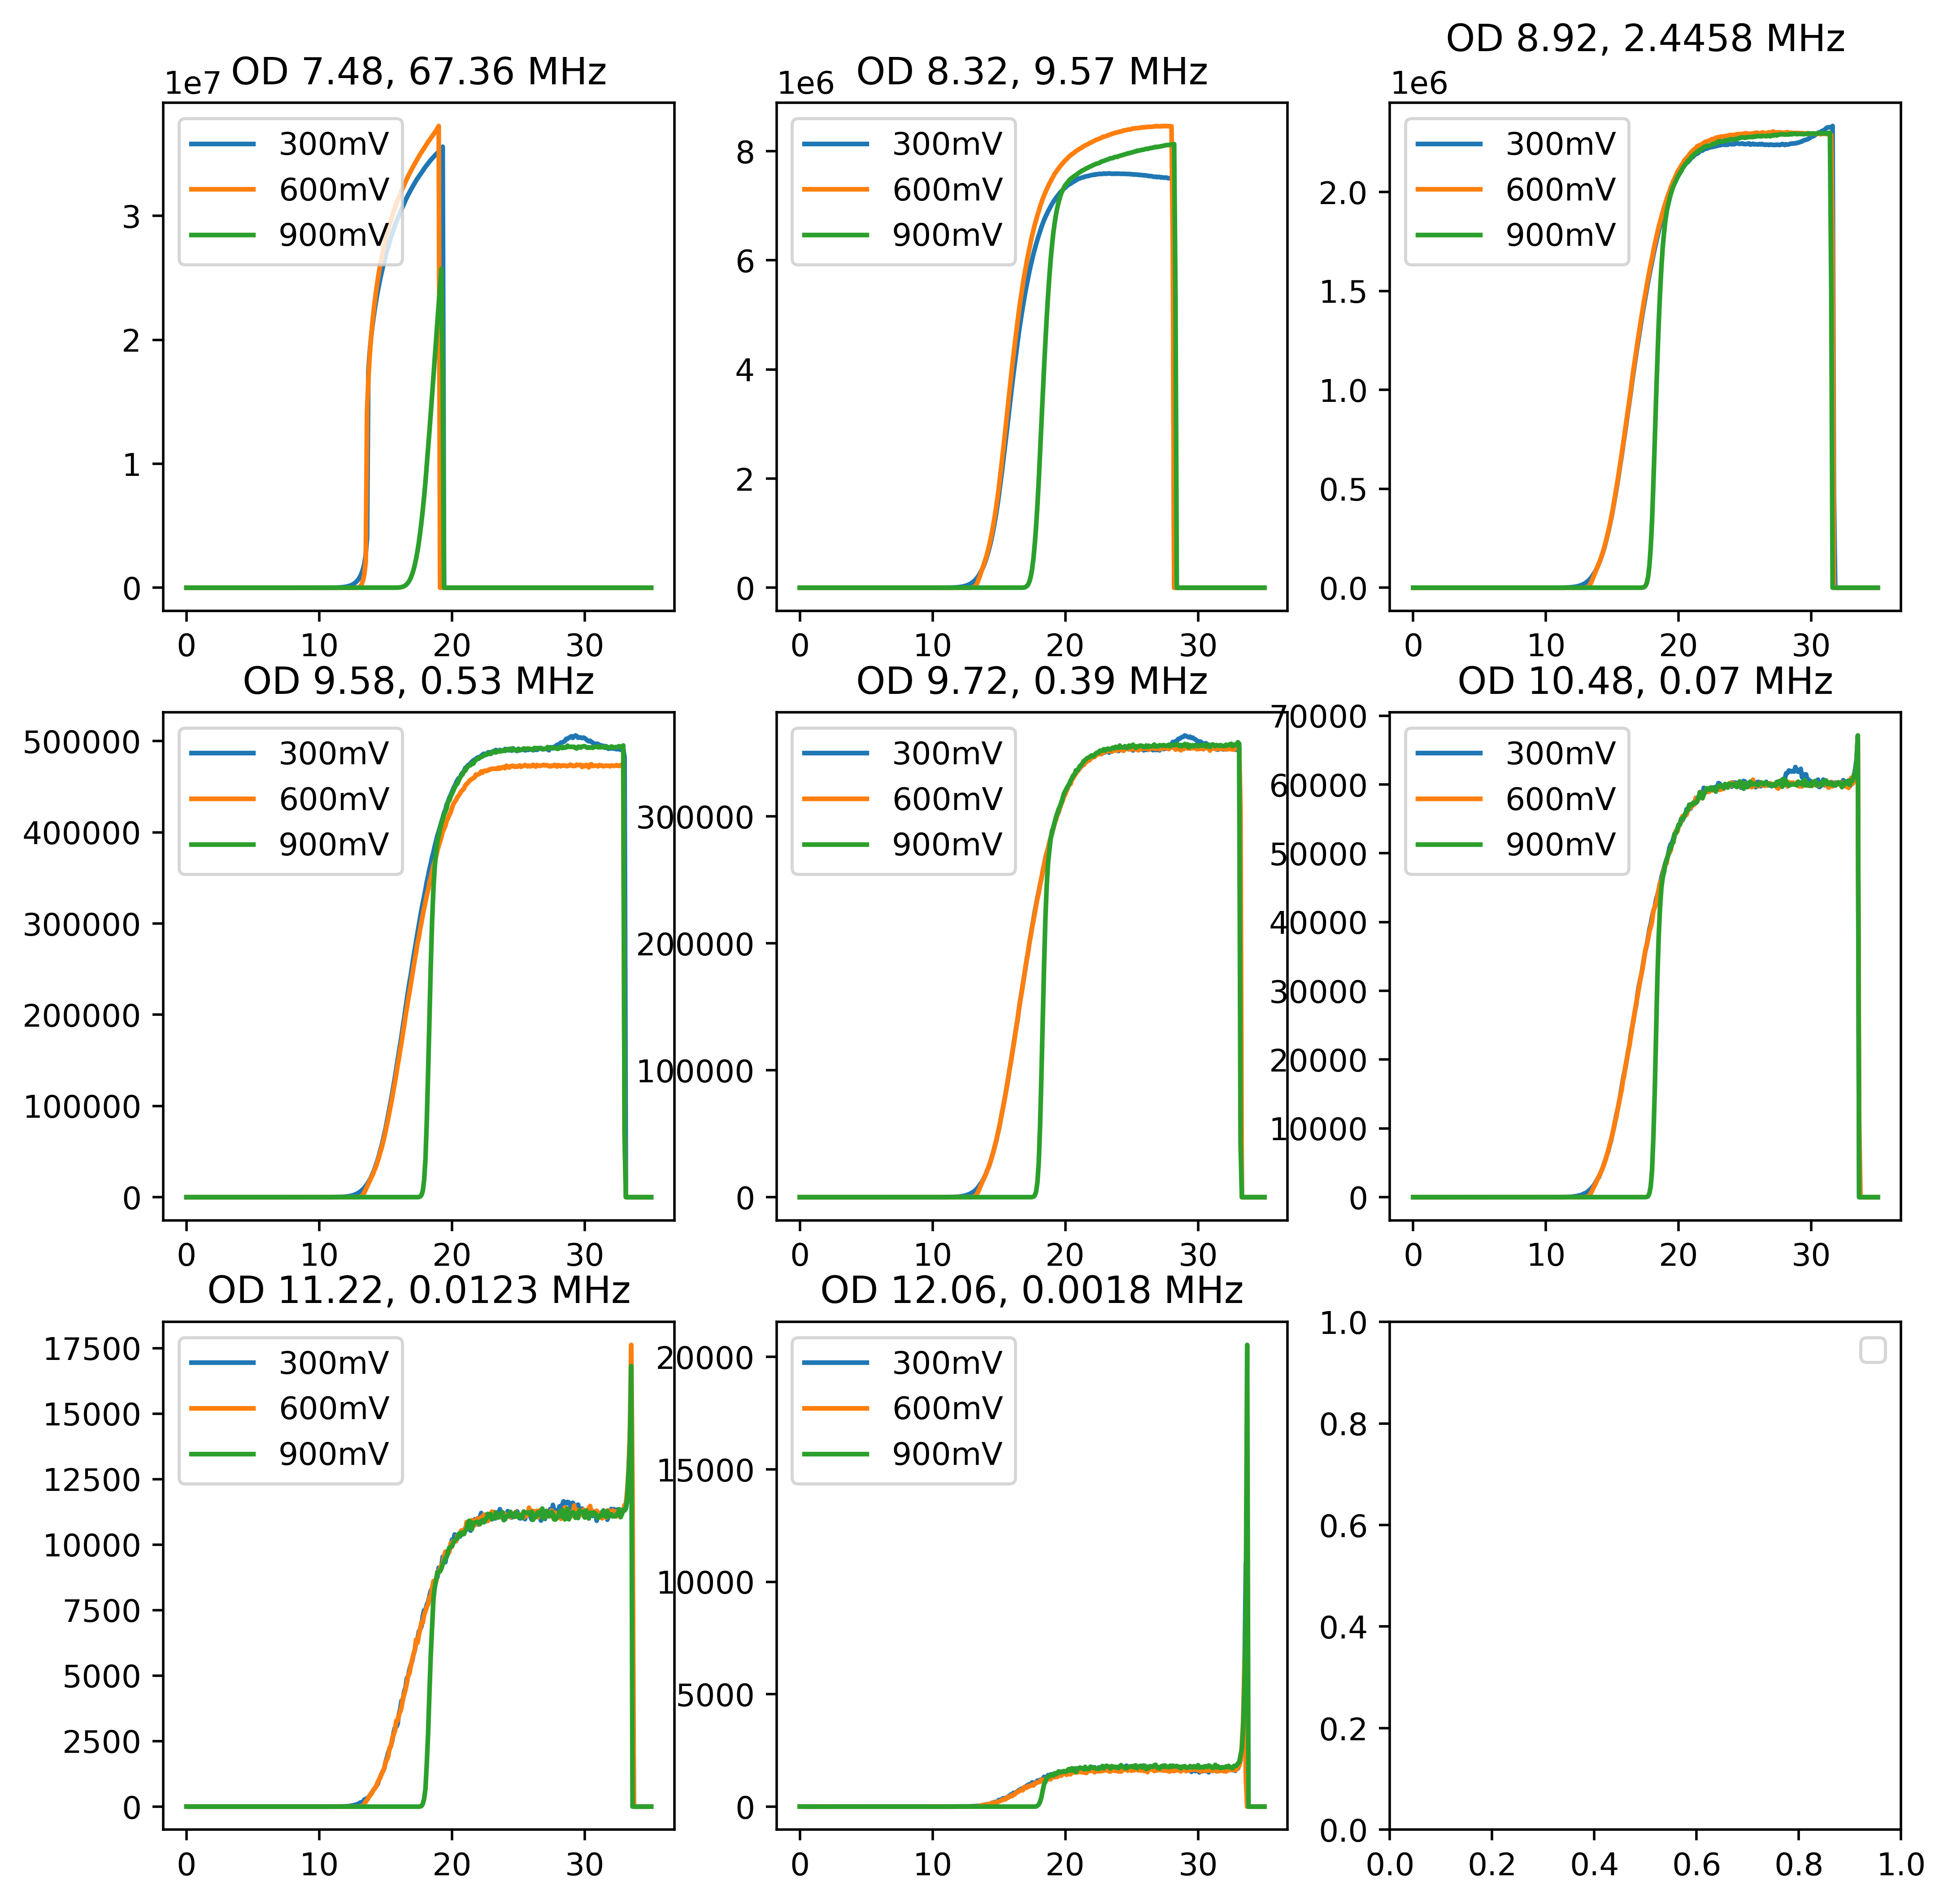

In [110]:
# Plotting - Investigation of trigger voltage dependency 

fig, ax = plt.subplots(3, 3, figsize=(10,10))
ax[1,0].plot(bias_sweep_9_58_300[:,0], bias_sweep_9_58_300[:,1], label="300mV" )
ax[1,0].plot(bias_sweep_9_58_600[:,0], bias_sweep_9_58_600[:,1], label="600mV" )
ax[1,0].plot(bias_sweep_9_58_900[:,0], bias_sweep_9_58_900[:,1], label="900mV" )
ax[1,0].legend(loc="upper left")
ax[1,0].set_title(f"OD 9.58, {round(photons_per_second(beam_pow_2, OD_9_58)*10**(-6), 2)} MHz")

ax[0,1].plot(bias_sweep_8_32_300[:,0], bias_sweep_8_32_300[:,1], label="300mV" )
ax[0,1].plot(bias_sweep_8_32_600[:,0], bias_sweep_8_32_600[:,1], label="600mV" )
ax[0,1].plot(bias_sweep_8_32_900[:,0], bias_sweep_8_32_900[:,1], label="900mV" )
ax[0,1].legend(loc="upper left")
ax[0,1].set_title(f"OD 8.32, {round(photons_per_second(beam_pow_2, OD_8_32)*10**(-6), 2)} MHz")

ax[0,0].plot(bias_sweep_7_48_300[:,0], bias_sweep_7_48_300[:,1], label="300mV" )
ax[0,0].plot(bias_sweep_7_48_600[:,0], bias_sweep_7_48_600[:,1], label="600mV" )
ax[0,0].plot(bias_sweep_7_48_900[:,0], bias_sweep_7_48_900[:,1], label="900mV" )
ax[0,0].legend(loc="upper left")
ax[0,0].set_title(f"OD 7.48, {round(photons_per_second(beam_pow_2, OD_7_48)*10**(-6),2)} MHz")

ax[1,1].plot(bias_sweep_9_72_300[:,0], bias_sweep_9_72_300[:,1], label="300mV" )
ax[1,1].plot(bias_sweep_9_72_600[:,0], bias_sweep_9_72_600[:,1], label="600mV" )
ax[1,1].plot(bias_sweep_9_72_900[:,0], bias_sweep_9_72_900[:,1], label="900mV" )
ax[1,1].legend(loc="upper left")
ax[1,1].set_title(f"OD 9.72, {round(photons_per_second(beam_pow_2, OD_9_72)*10**(-6),2)} MHz")

ax[1,2].plot(bias_sweep_10_48_300[:,0], bias_sweep_10_48_300[:,1], label="300mV" )
ax[1,2].plot(bias_sweep_10_48_600[:,0], bias_sweep_10_48_600[:,1], label="600mV" )
ax[1,2].plot(bias_sweep_10_48_900[:,0], bias_sweep_10_48_900[:,1], label="900mV" )
ax[1,2].legend(loc="upper left")
ax[1,2].set_title(f"OD 10.48, {round(photons_per_second(beam_pow_2, OD_10_48)*10**(-6),2)} MHz")

ax[2,1].plot(bias_sweep_12_06_300[:,0], bias_sweep_12_06_300[:,1], label="300mV" )
ax[2,1].plot(bias_sweep_12_06_600[:,0], bias_sweep_12_06_600[:,1], label="600mV" )
ax[2,1].plot(bias_sweep_12_06_900[:,0], bias_sweep_12_06_900[:,1], label="900mV" )
ax[2,1].legend(loc="upper left")
ax[2,1].set_title(f"OD 12.06, {round(photons_per_second(beam_pow_2, OD_12_06)*10**(-6),4)} MHz")

ax[0,2].plot(bias_sweep_8_92_300[:,0], bias_sweep_8_92_300[:,1], label="300mV" )
ax[0,2].plot(bias_sweep_8_92_600[:,0], bias_sweep_8_92_600[:,1], label="600mV" )
ax[0,2].plot(bias_sweep_8_92_900[:,0], bias_sweep_8_92_900[:,1], label="900mV" )
ax[0,2].legend(loc="upper left")
ax[0,2].set_title(f"OD 8.92, {round(photons_per_second(beam_pow_2, OD_8_92)*10**(-6),4)} MHz")

ax[2,0].plot(bias_sweep_11_22_300[:,0], bias_sweep_11_22_300[:,1], label="300mV" )
ax[2,0].plot(bias_sweep_11_22_600[:,0], bias_sweep_11_22_600[:,1], label="600mV" )
ax[2,0].plot(bias_sweep_11_22_900[:,0], bias_sweep_11_22_900[:,1], label="900mV" )
ax[2,0].legend(loc="upper left")
ax[2,0].set_title(f"OD 11.22, {round(photons_per_second(beam_pow_2, OD_11_22) *10**(-6), 4)} MHz")

plt.legend()

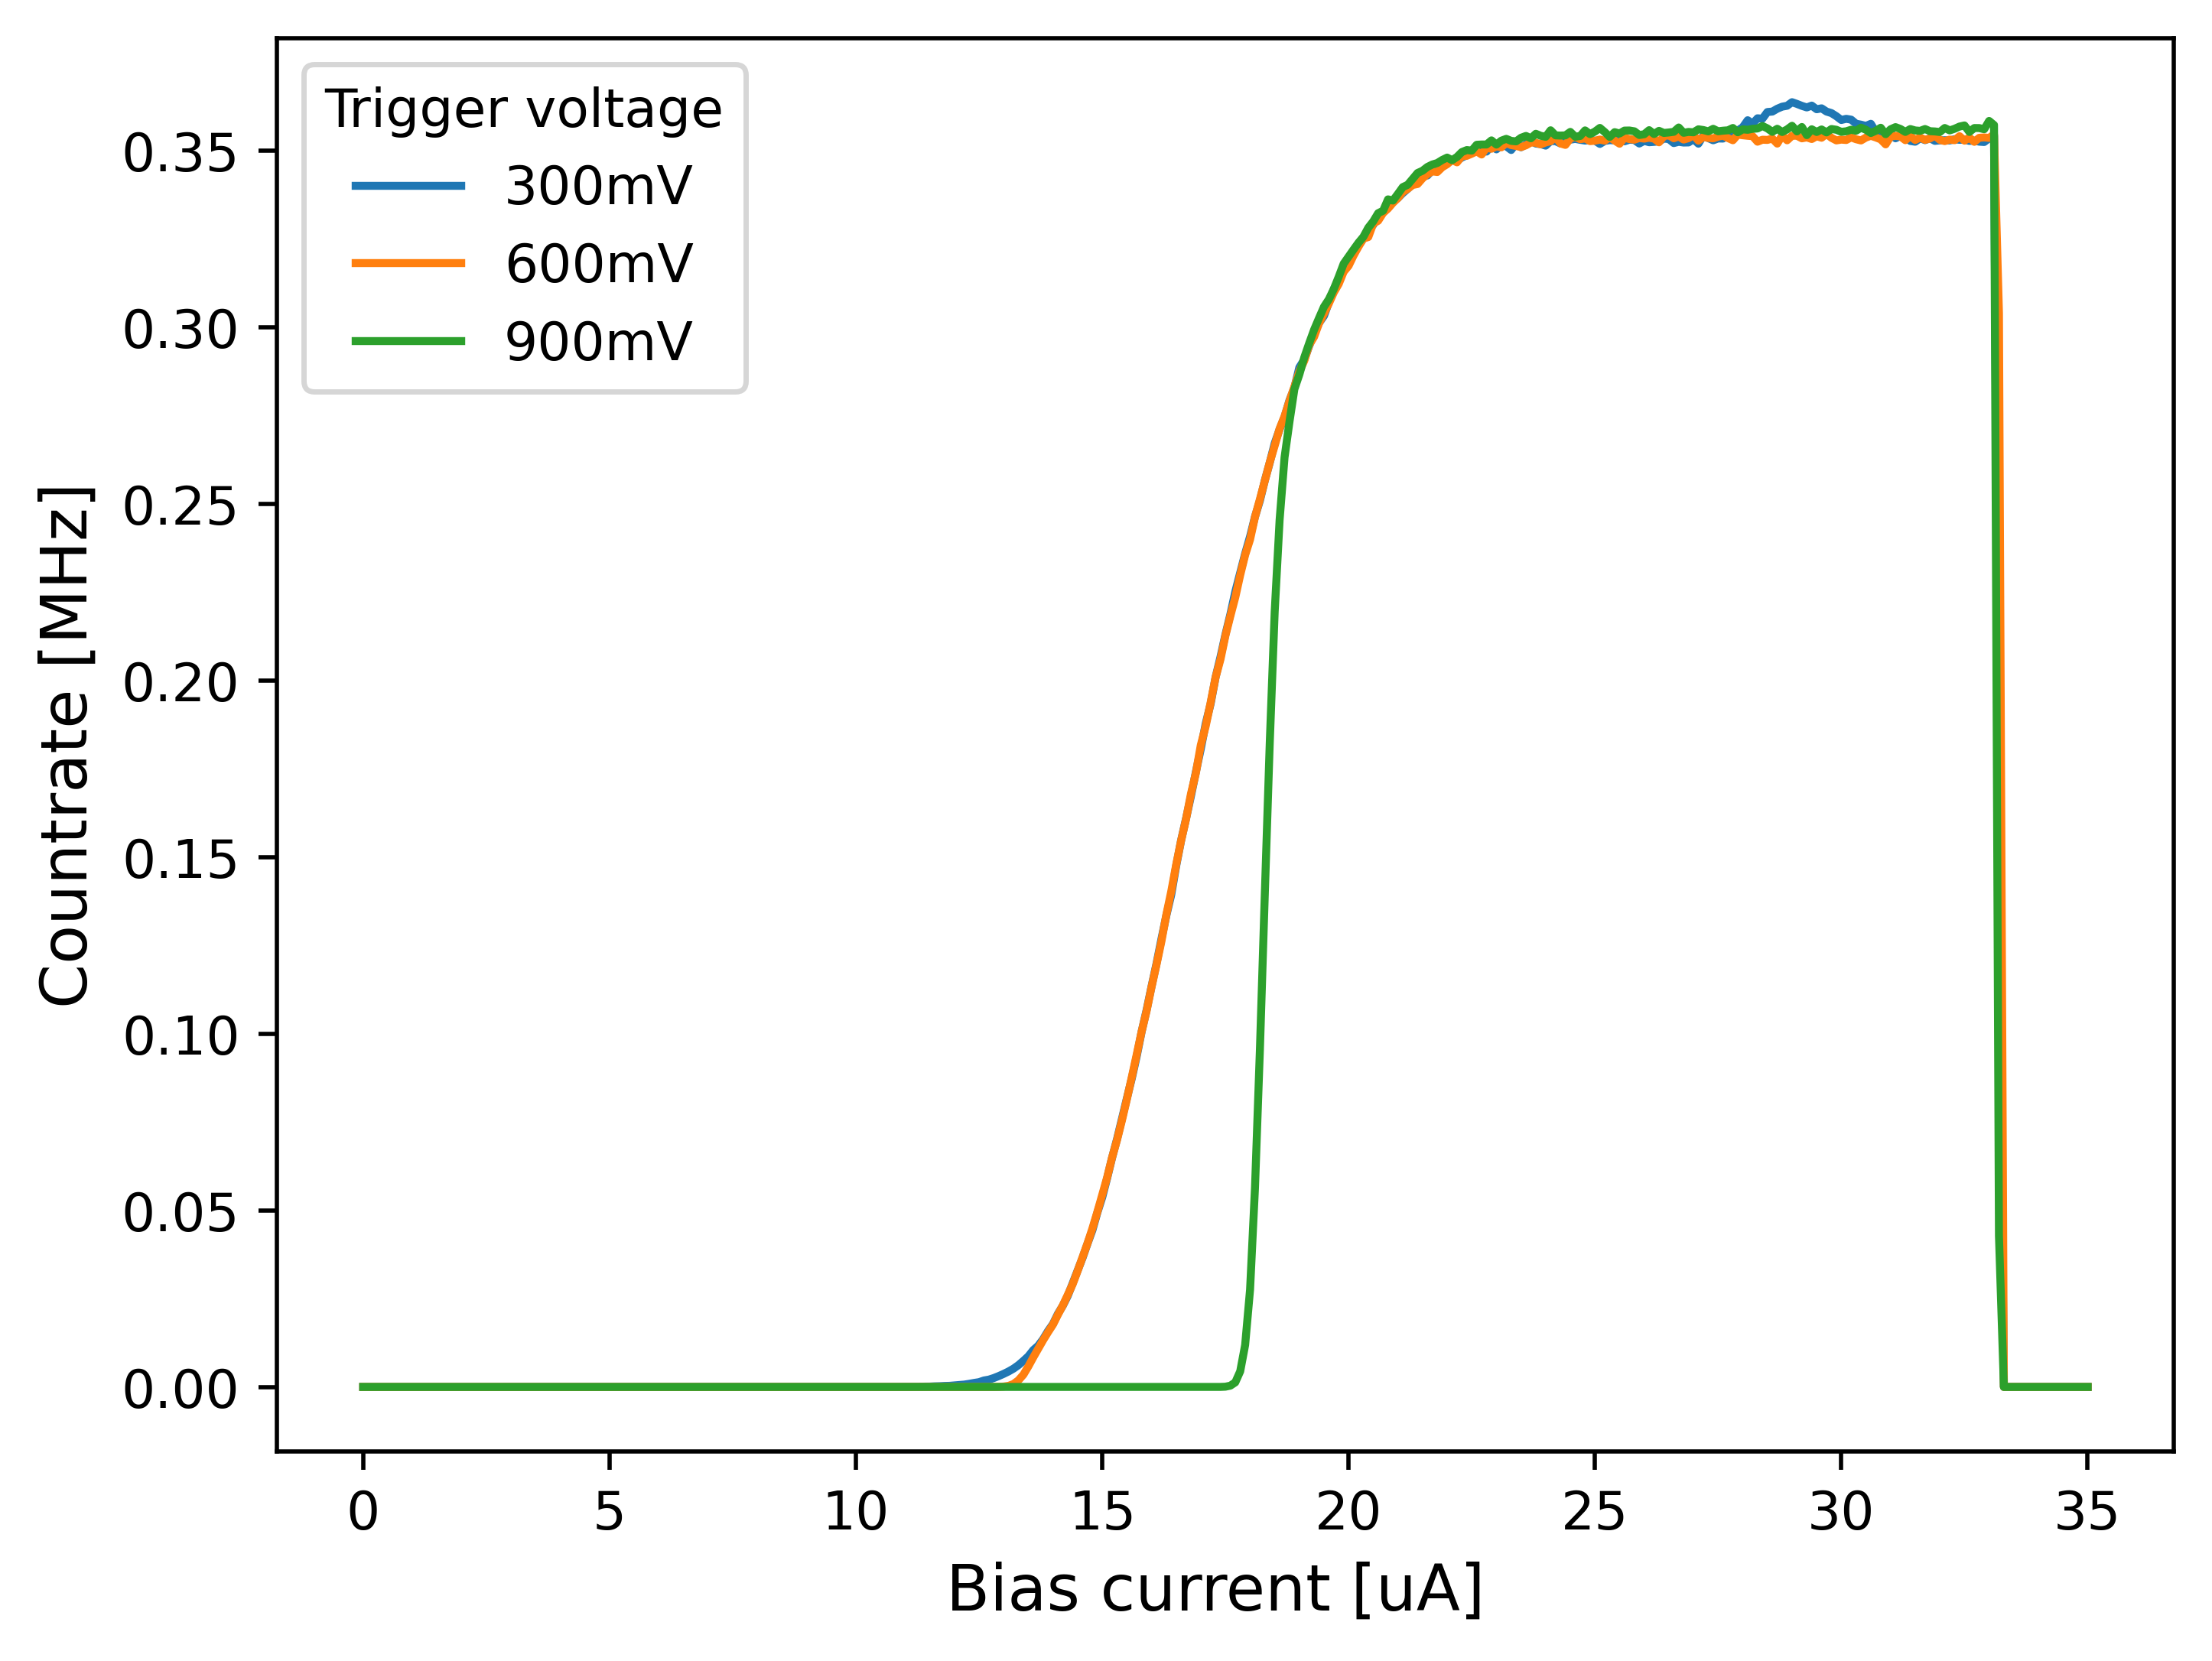

In [98]:
# Plotting - Investigation of trigger voltage dependency OD 9.72

plt.plot(bias_sweep_9_72_300[:,0], bias_sweep_9_72_300[:,1]*10**(-6), label="300mV" )
plt.plot(bias_sweep_9_72_600[:,0], bias_sweep_9_72_600[:,1]*10**(-6), label="600mV" )    
plt.plot(bias_sweep_9_72_900[:,0], bias_sweep_9_72_900[:,1]*10**(-6), label="900mV" )
plt.legend()

ylabel = f'Countrate [MHz]'
xlabel = f'Bias current [uA] '
save_name = "HQO_20240726_countrate_bias_sweep_tv_3_6_9_thesis_9_72"

plott_settings_default("", xlabel, ylabel, name_for_saving=save_name, legend_title="Trigger voltage")

plt.show()

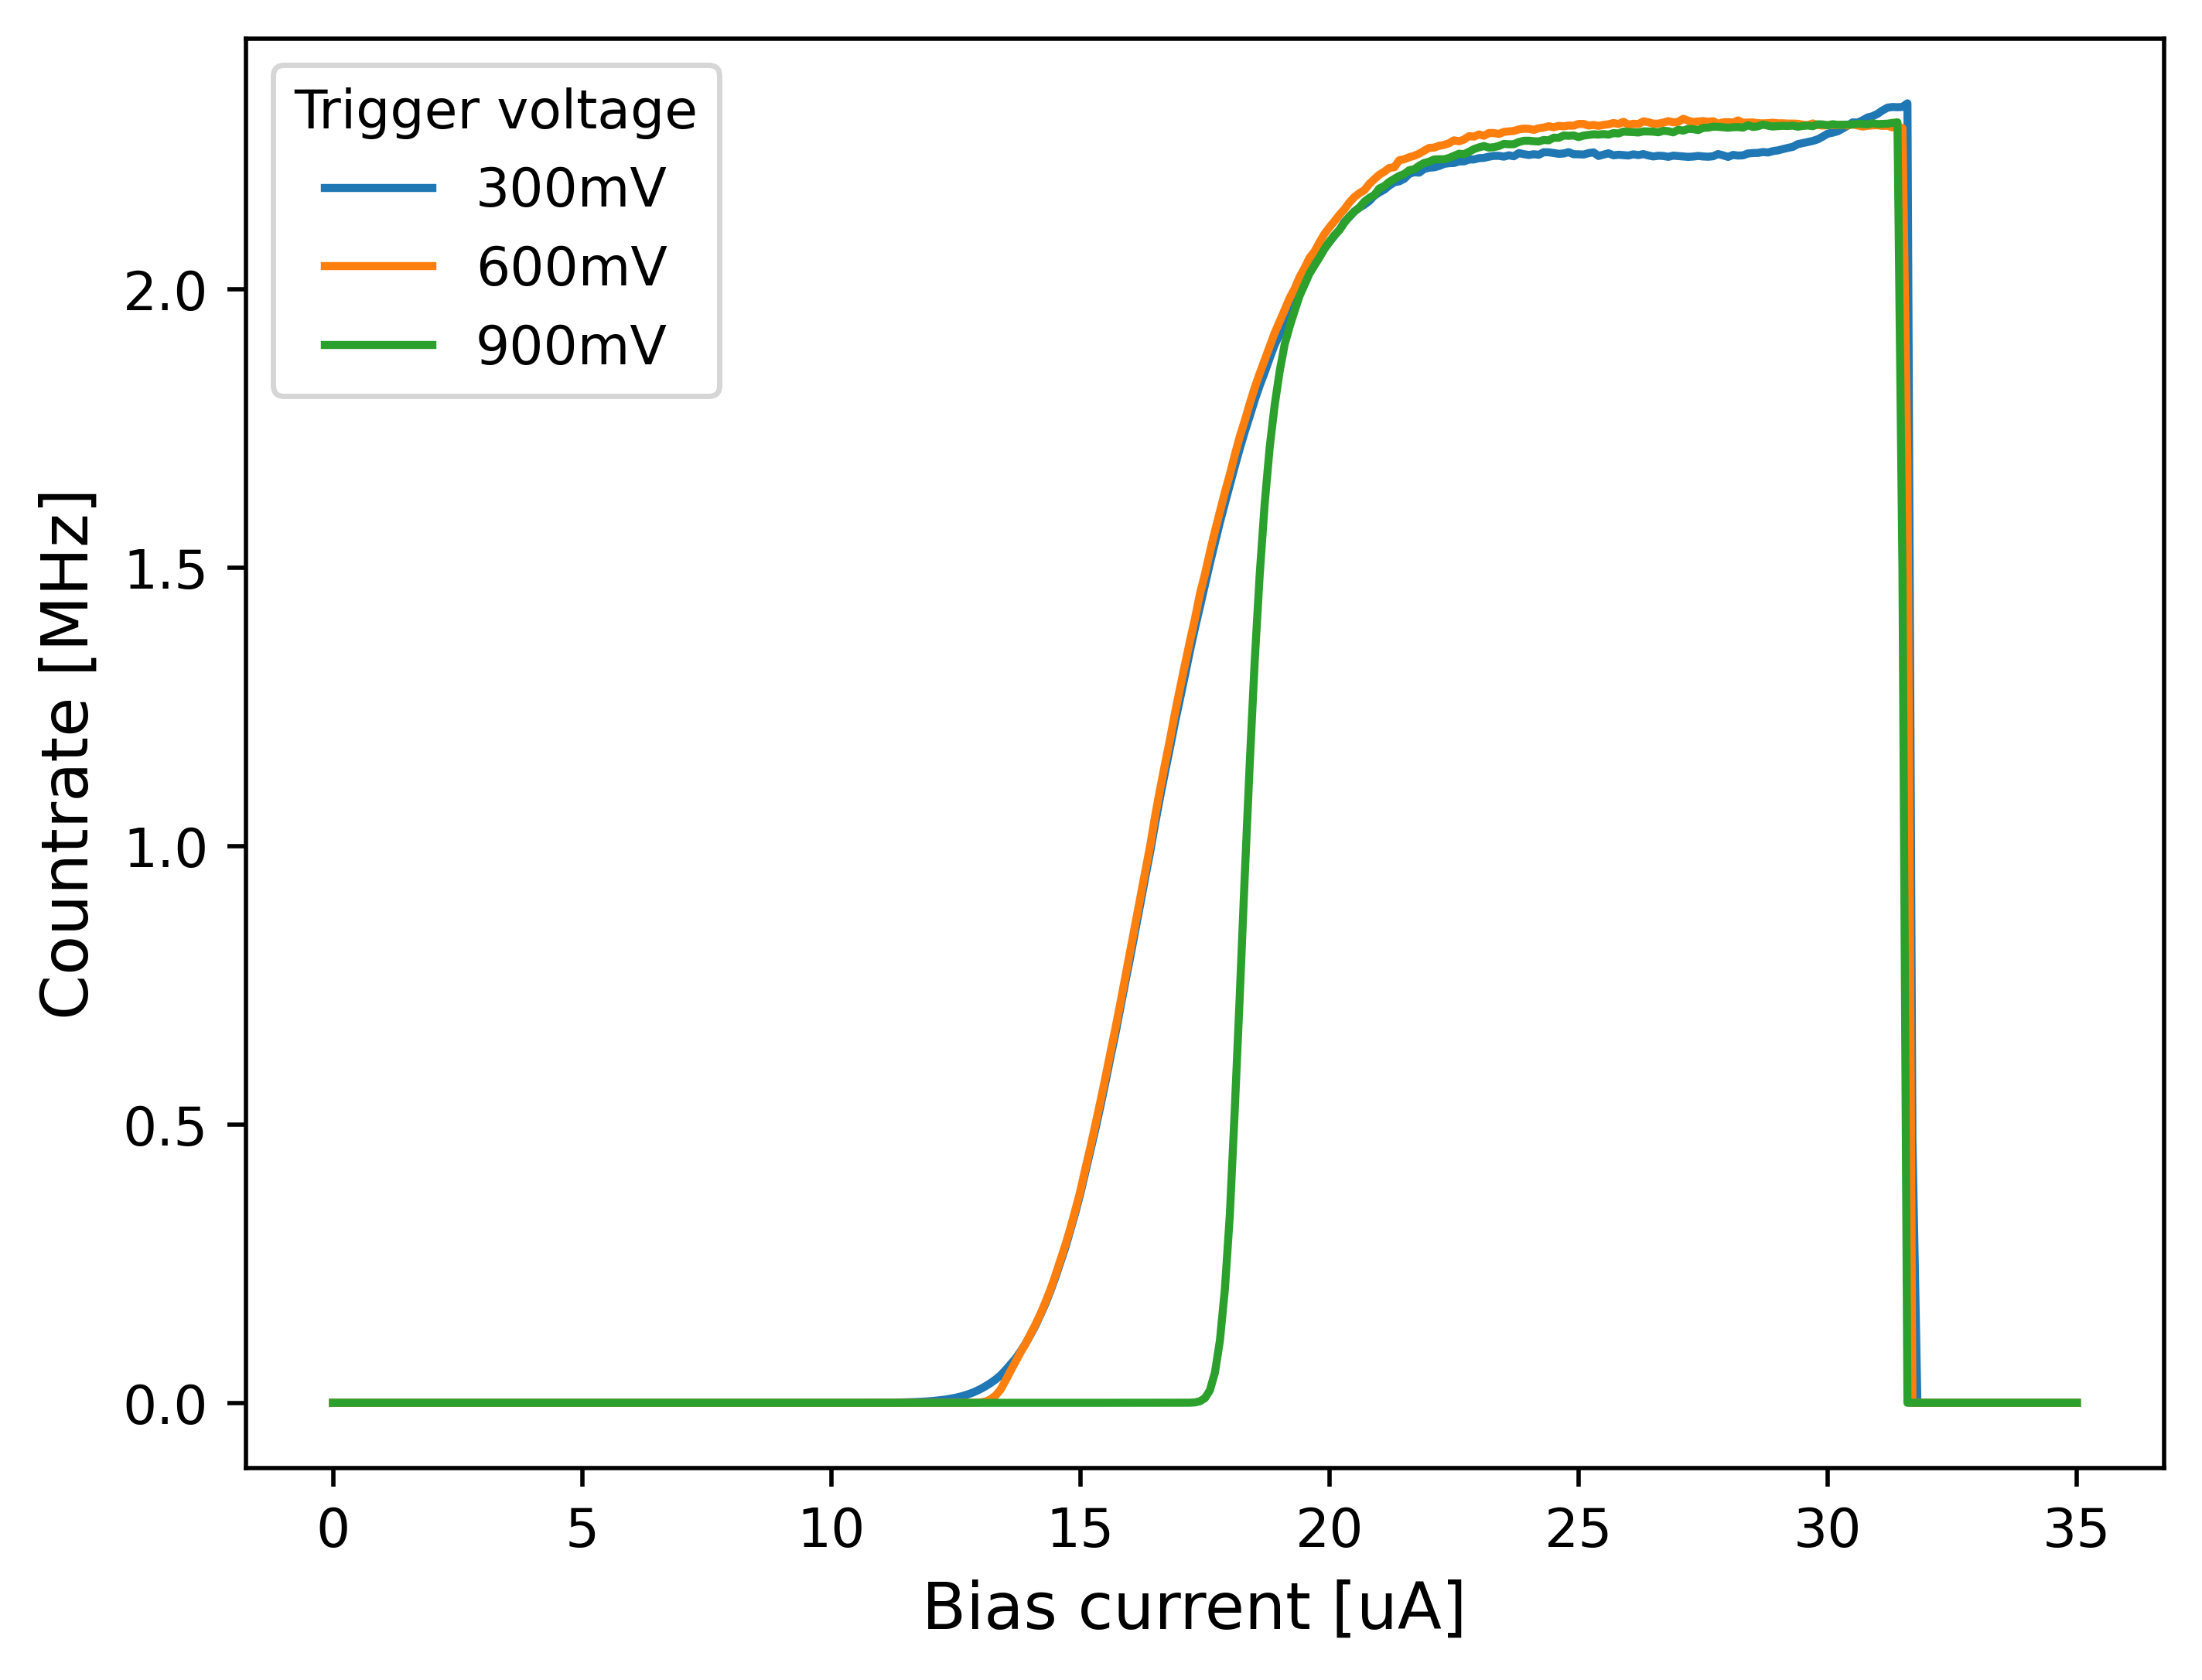

In [101]:
# Plotting - Investigation of trigger voltage dependency OD 8.92

plt.plot(bias_sweep_8_92_300[:,0], bias_sweep_8_92_300[:,1]*10**(-6), label="300mV" )
plt.plot(bias_sweep_8_92_600[:,0], bias_sweep_8_92_600[:,1]*10**(-6), label="600mV" )    
plt.plot(bias_sweep_8_92_900[:,0], bias_sweep_8_92_900[:,1]*10**(-6), label="900mV" )
plt.legend()

ylabel = f'Countrate [MHz]'
xlabel = f'Bias current [uA] '
save_name = "HQO_20240726_countrate_bias_sweep_tv_3_6_9_thesis_8_92"

plott_settings_default("", xlabel, ylabel, name_for_saving=save_name, legend_title="Trigger voltage")

plt.show()

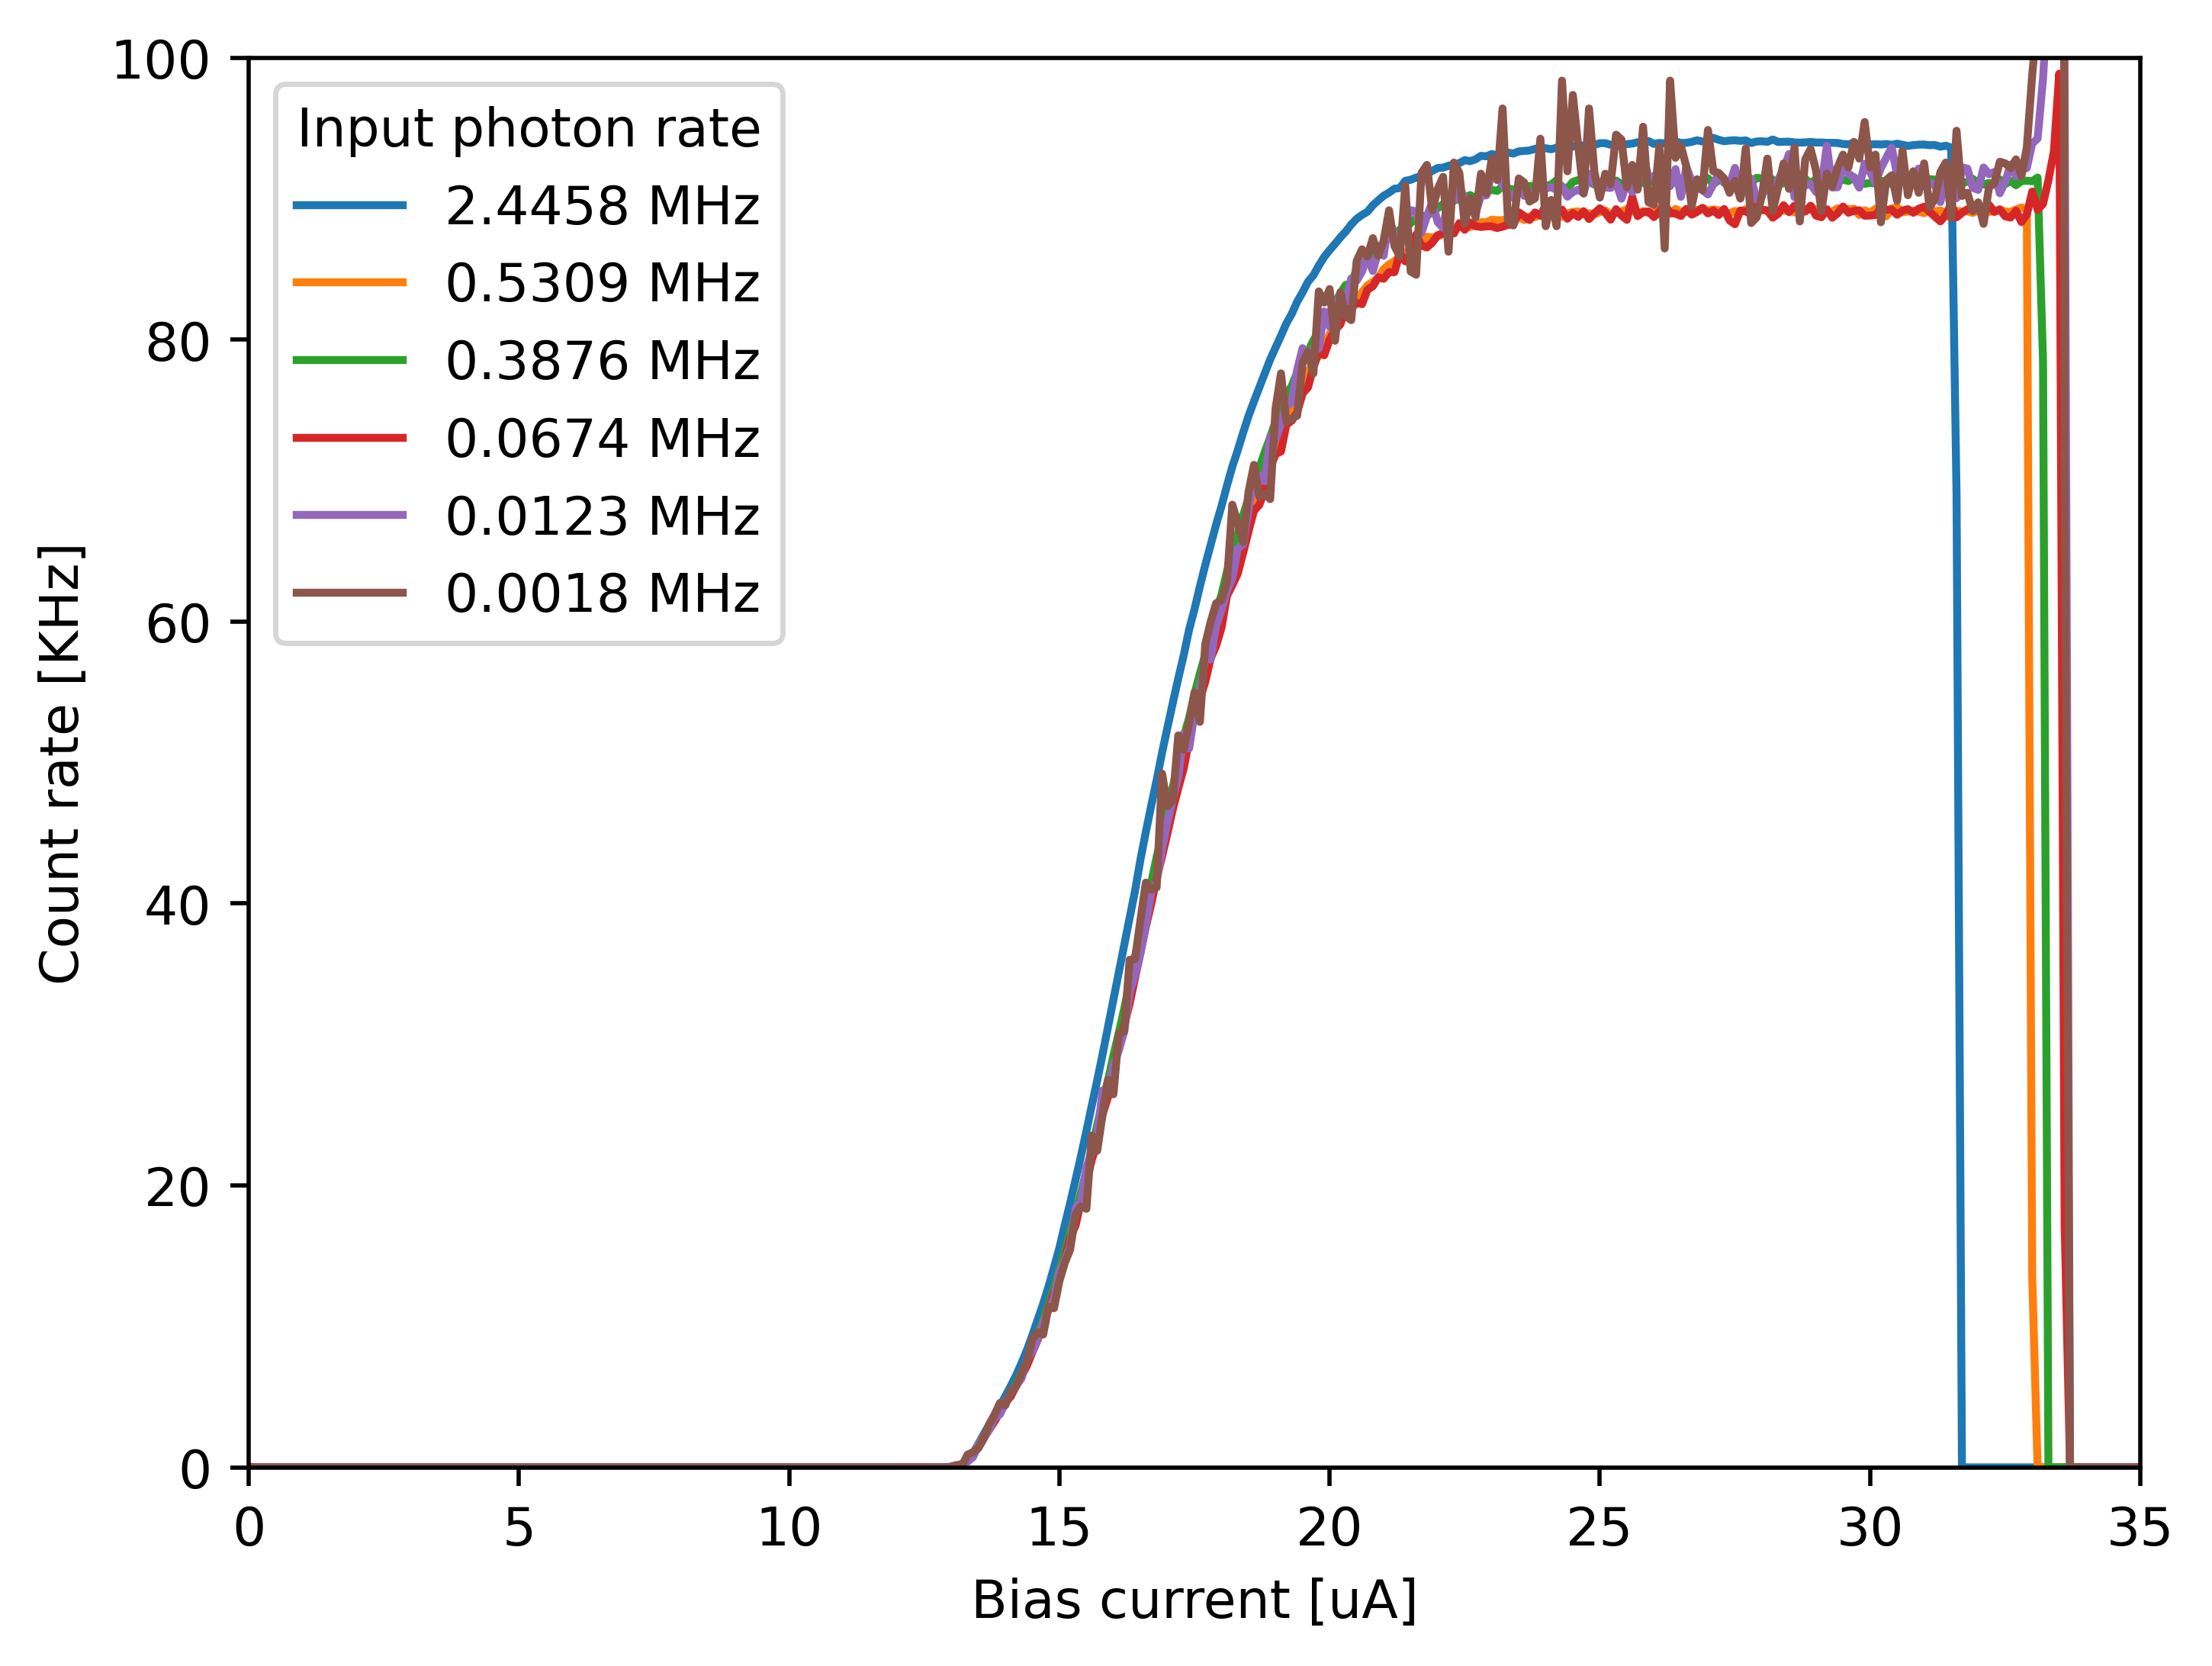

In [180]:
# Plotting - Investigation of different count rates at constant trigger voltage of 600mV 

plt.plot(bias_sweep_8_92_600[:,0], bias_sweep_8_92_600[:,1]/photons_per_second(beam_pow_2, OD_8_92) * 100, label=f"{round(photons_per_second(beam_pow_2, OD_8_92)*10**(-6),4)} MHz" )
plt.plot(bias_sweep_9_58_600[:,0], bias_sweep_9_58_600[:,1]/photons_per_second(beam_pow_2, OD_9_58) * 100, label=f"{round(photons_per_second(beam_pow_2, OD_9_58)*10**(-6), 4)} MHz") 
plt.plot(bias_sweep_9_72_600[:,0], bias_sweep_9_72_600[:,1]/photons_per_second(beam_pow_2, OD_9_72) * 100, label=f"{round(photons_per_second(beam_pow_2, OD_9_72)*10**(-6), 4)} MHz")
plt.plot(bias_sweep_10_48_600[:,0], bias_sweep_10_48_600[:,1]/photons_per_second(beam_pow_2, OD_10_48)  * 100, label=f"{round(photons_per_second(beam_pow_2, OD_10_48)*10**(-6), 4)} MHz")
# plt.plot(bias_sweep_11_22_600[:,0], bias_sweep_11_22_600[:,1]/photons_per_second(beam_pow_2, OD_11_22)  * 100, label=f"{round(photons_per_second(beam_pow_2, OD_11_22)*10**(-6), 4)} MHz")
# plt.plot(bias_sweep_12_06_600[:,0], bias_sweep_12_06_600[:,1]/photons_per_second(beam_pow_2, OD_12_06)  * 100, label=f"{round(photons_per_second(beam_pow_2, OD_12_06)*10**(-6), 4)} MHz")
# plt.axhline(y=90, color='r', linestyle='--', label='90%')
plt.xlim([0, 35])
plt.ylim([0,100])
plt.xlabel("Bias current [uA]")
plt.ylabel("Count rate [KHz]")
plt.legend(title="Input photon rate")
save_name = "HQO_20240726_count_rate_bias_sweep_tv_600_thesis"
plt.show()



[87.24196063 90.40812959 91.83447549 89.75967359 90.79252033 90.33183333]
[ 4.95534797  9.52884546  9.54997688  9.4479234   9.65696175 10.41570459]


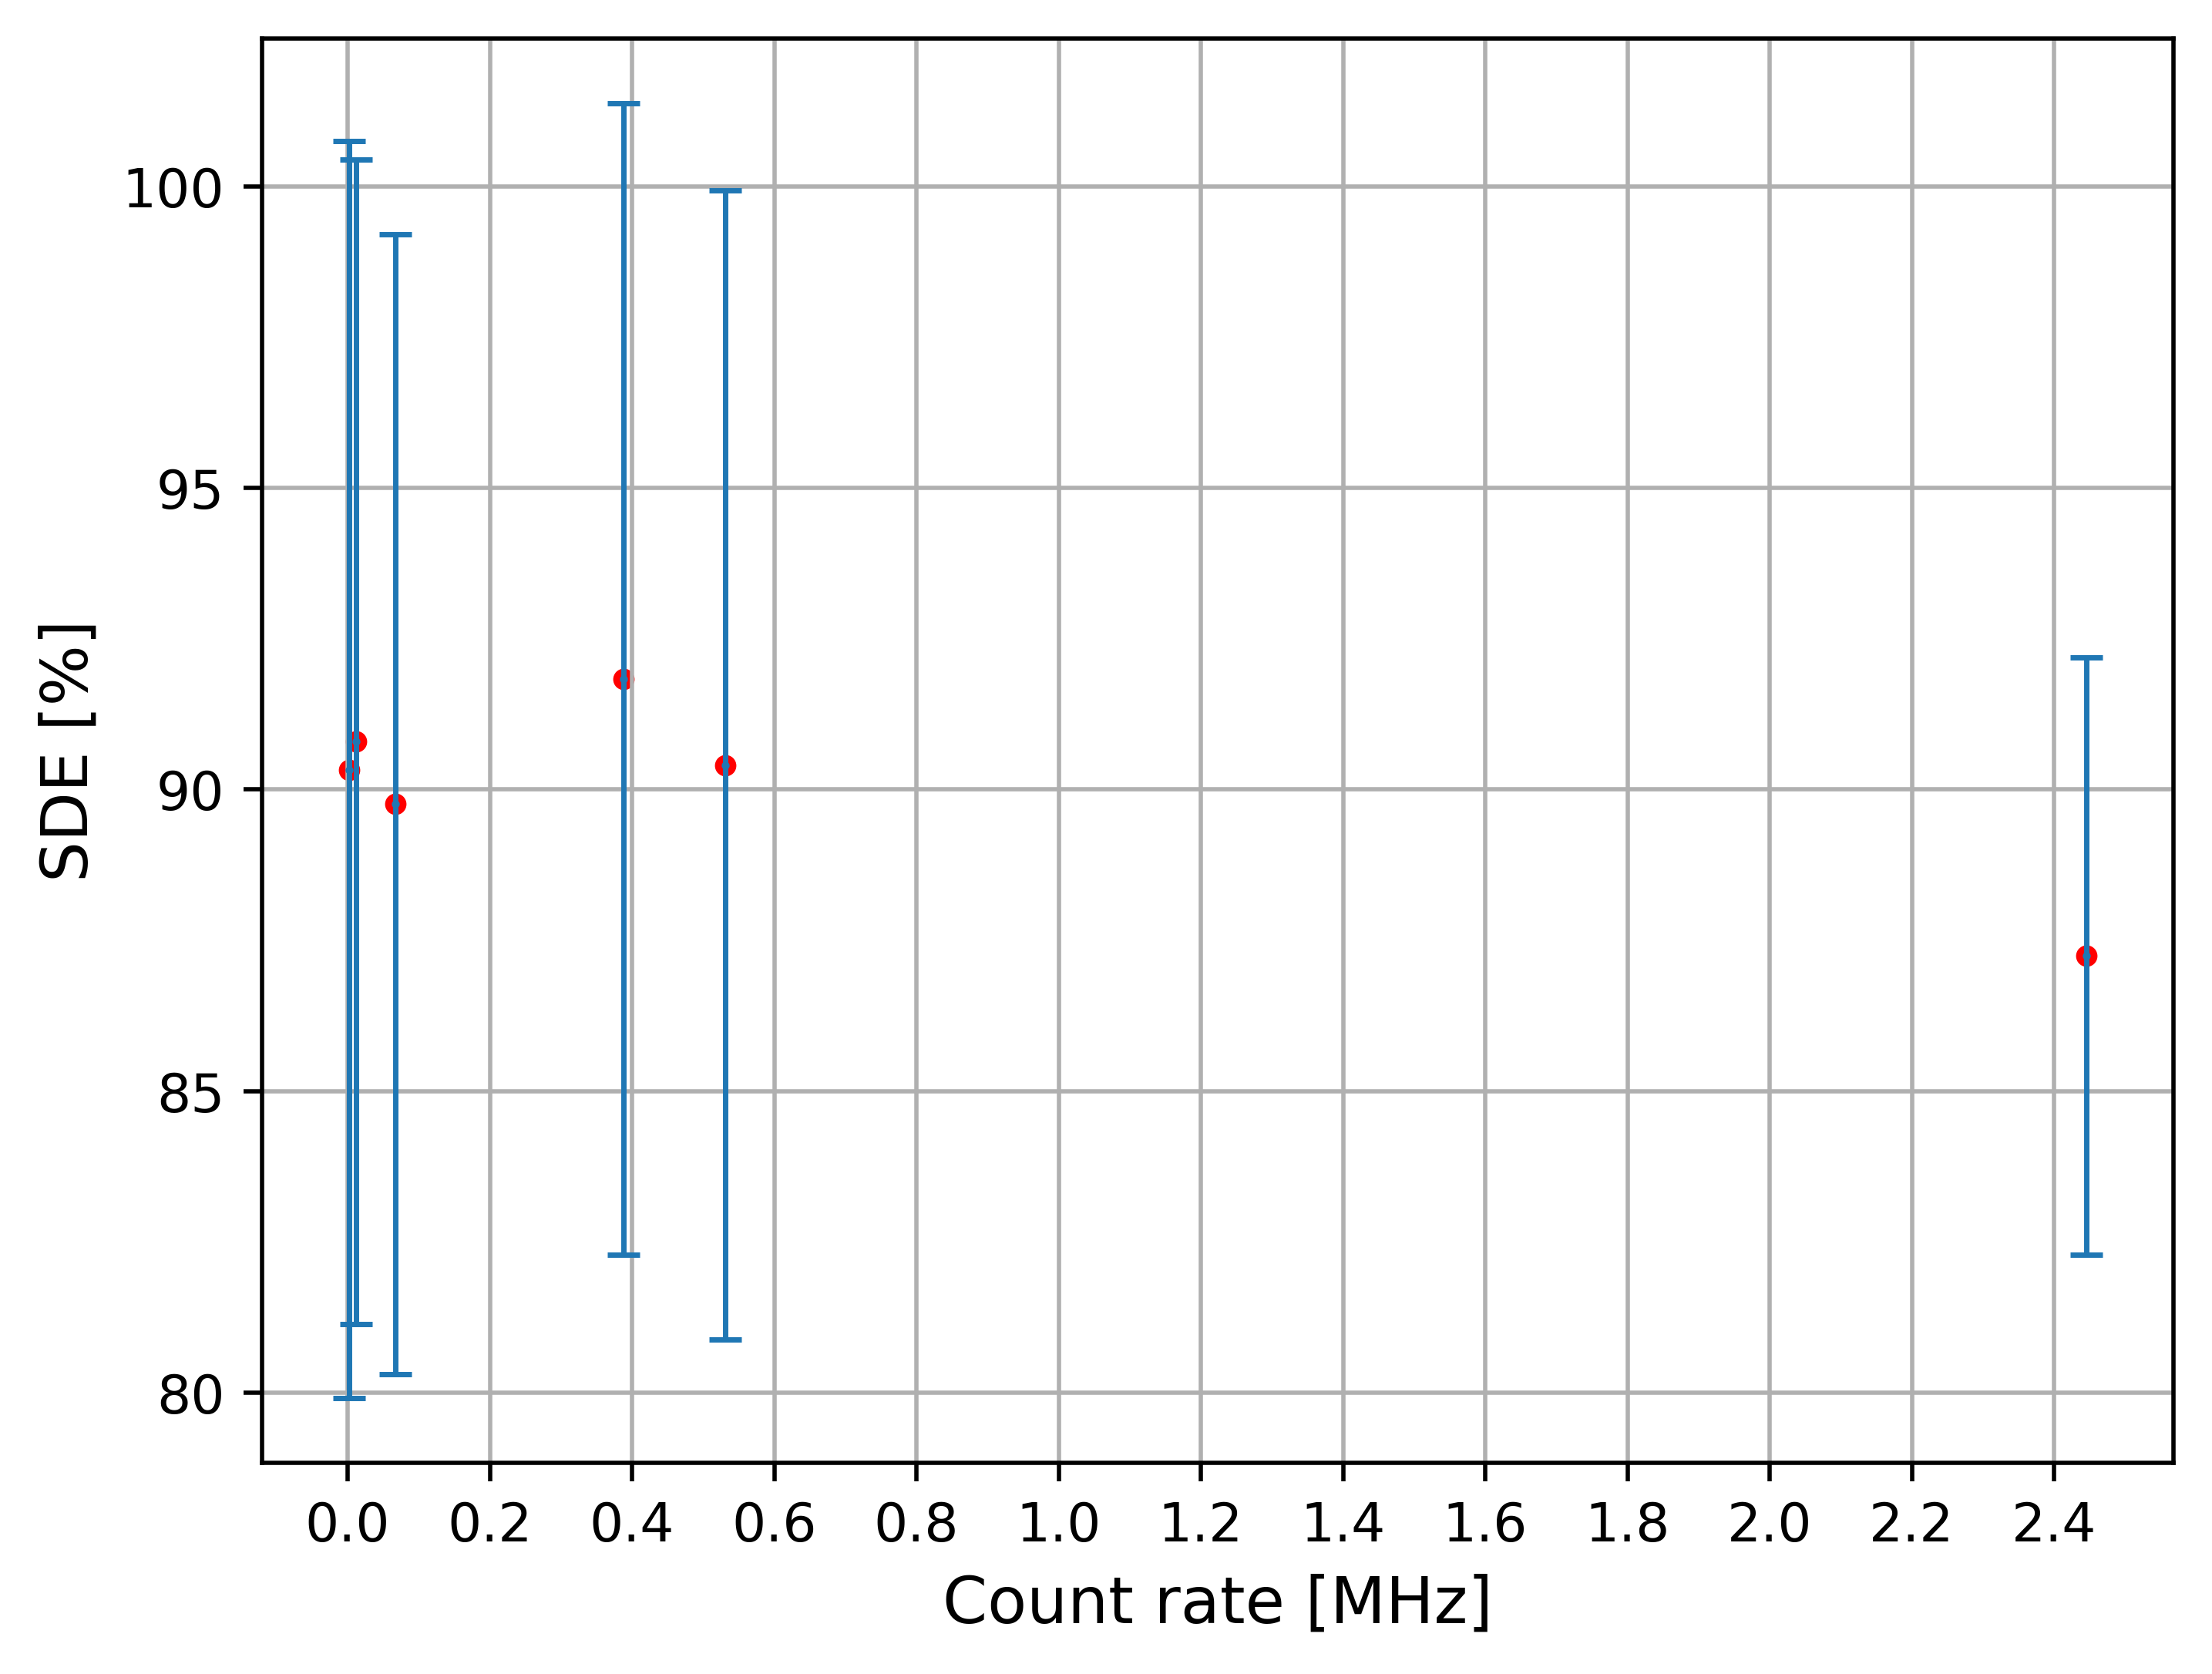

In [212]:
# Plotting - Investigation of different count rates at constant trigger voltage of 600mv of the folder Counts vs _sde
homedir_2 = os.listdir("./System detection efficiency/Counts_vs_sde")
sde_measurement_list = get_list_by_tv(homedir_2, 600)

# load each file of the list and average the counts
def get_list_by_OD(file_list, OD): 
    bias_list = list(filter(lambda k: "OD_" + OD in k, file_list))
    return bias_list

# load each file of the list and average the counts
counts_8_928 = get_list_by_OD(sde_measurement_list, "08_928")
counts_9_573 = get_list_by_OD(sde_measurement_list, "09_57")
counts_9_721 = get_list_by_OD(sde_measurement_list, "09_72")
counts_10_48 = get_list_by_OD(sde_measurement_list, "10_48")
counts_11_22 = get_list_by_OD(sde_measurement_list, "11_22")
counts_12_06 = get_list_by_OD(sde_measurement_list, "12_06")

# load each file of the list and average the counts#
def load_files_mean_std(file_list):
    counts = []
    for file in file_list:
        counts.append(np.loadtxt(f"./System detection efficiency/Counts_vs_sde/{file}", skiprows=1, usecols=[1]))
    return round(np.mean(np.mean(counts)),3), round(np.std(counts),3) 

# load the files and calculate the mean and standard deviation
counts_mean_8_928, counts_std_8_928 = load_files_mean_std(counts_8_928)
counts_mean_9_573, counts_std_9_573 = load_files_mean_std(counts_9_573)
counts_mean_9_721, counts_std_9_721 = load_files_mean_std(counts_9_721)
counts_mean_10_48, counts_std_10_48 = load_files_mean_std(counts_10_48)
counts_mean_11_22, counts_std_11_22 = load_files_mean_std(counts_11_22)
counts_mean_12_06, counts_std_12_06 = load_files_mean_std(counts_12_06)

# array of mean values, standard deviations and count rates in MHz
mean_counts = np.array([counts_mean_8_928, counts_mean_9_573, counts_mean_9_721, counts_mean_10_48, counts_mean_11_22, counts_mean_12_06])*10**(-6)
std_counts = np.array([counts_std_8_928, counts_std_9_573, counts_std_9_721, counts_std_10_48, counts_std_11_22, counts_std_12_06])*10**(-6)
count_rates_arr = np.array([round(photons_per_second(beam_pow_2, OD_8_92) *10**(-6),4), round(photons_per_second(beam_pow_2, OD_9_58) *10**(-6),4), round(photons_per_second(beam_pow_2, OD_9_72) *10**(-6),4), round(photons_per_second(beam_pow_2, OD_10_48) *10**(-6),4), round(photons_per_second(beam_pow_2, OD_11_22) *10**(-6),4), round(photons_per_second(beam_pow_2, OD_12_06) *10**(-6),4)])

# array of standard deviations in MHz
sde_error_arr = np.array([error_function_sde(beam_pow_2, OD_8_92, delta_OD_8_92, counts_mean_8_928), error_function_sde(beam_pow_2, OD_9_58, delta_OD_9_58, counts_mean_9_573), error_function_sde(beam_pow_2, OD_9_72, delta_OD_9_72, counts_mean_9_721), error_function_sde(beam_pow_2, OD_10_48, delta_OD_10_48, counts_mean_10_48), error_function_sde(beam_pow_2, OD_11_22, delta_OD_11_22, counts_mean_11_22), error_function_sde(beam_pow_2, OD_12_06, delta_OD_12_06, counts_mean_12_06)])

print(mean_counts/count_rates_arr * 100)
print(sde_error_arr*100)
# Plotting - Investigation of different count rates at constant trigger voltage of 600mv of the folder Counts vs sde - plotting with grid
# plt.scatter(count_rates_arr, mean_counts/count_rates_arr * 100 , marker=".", color="r")
# plt.errorbar(count_rates_arr, mean_counts/count_rates_arr * 100, yerr=sde_error_arr * 100, fmt=".", markersize=1, capsize=3, elinewidth=1)
# plt.xlabel("Count rate [MHz]")
# plt.ylabel("SDE [%]")
# plt.xscale("log")
# plt.legend(title="SDE")
# plt.grid()  
# plt.show()

plt.scatter(count_rates_arr, mean_counts/count_rates_arr * 100 , marker=".", color="r")
plt.errorbar(count_rates_arr, mean_counts/count_rates_arr * 100, yerr=sde_error_arr * 100, fmt=".", markersize=1, capsize=3, elinewidth=1)
plt.xlabel("Count rate [MHz]")
plt.ylabel("SDE [%]")
plt.xticks(np.arange(0, 2.5, step=0.2))
plt.grid()  
plott_settings_default("", "Count rate [MHz]", "SDE [%]", name_for_saving="HQO_20240727_sde_count_rate_thesis")
plt.show()


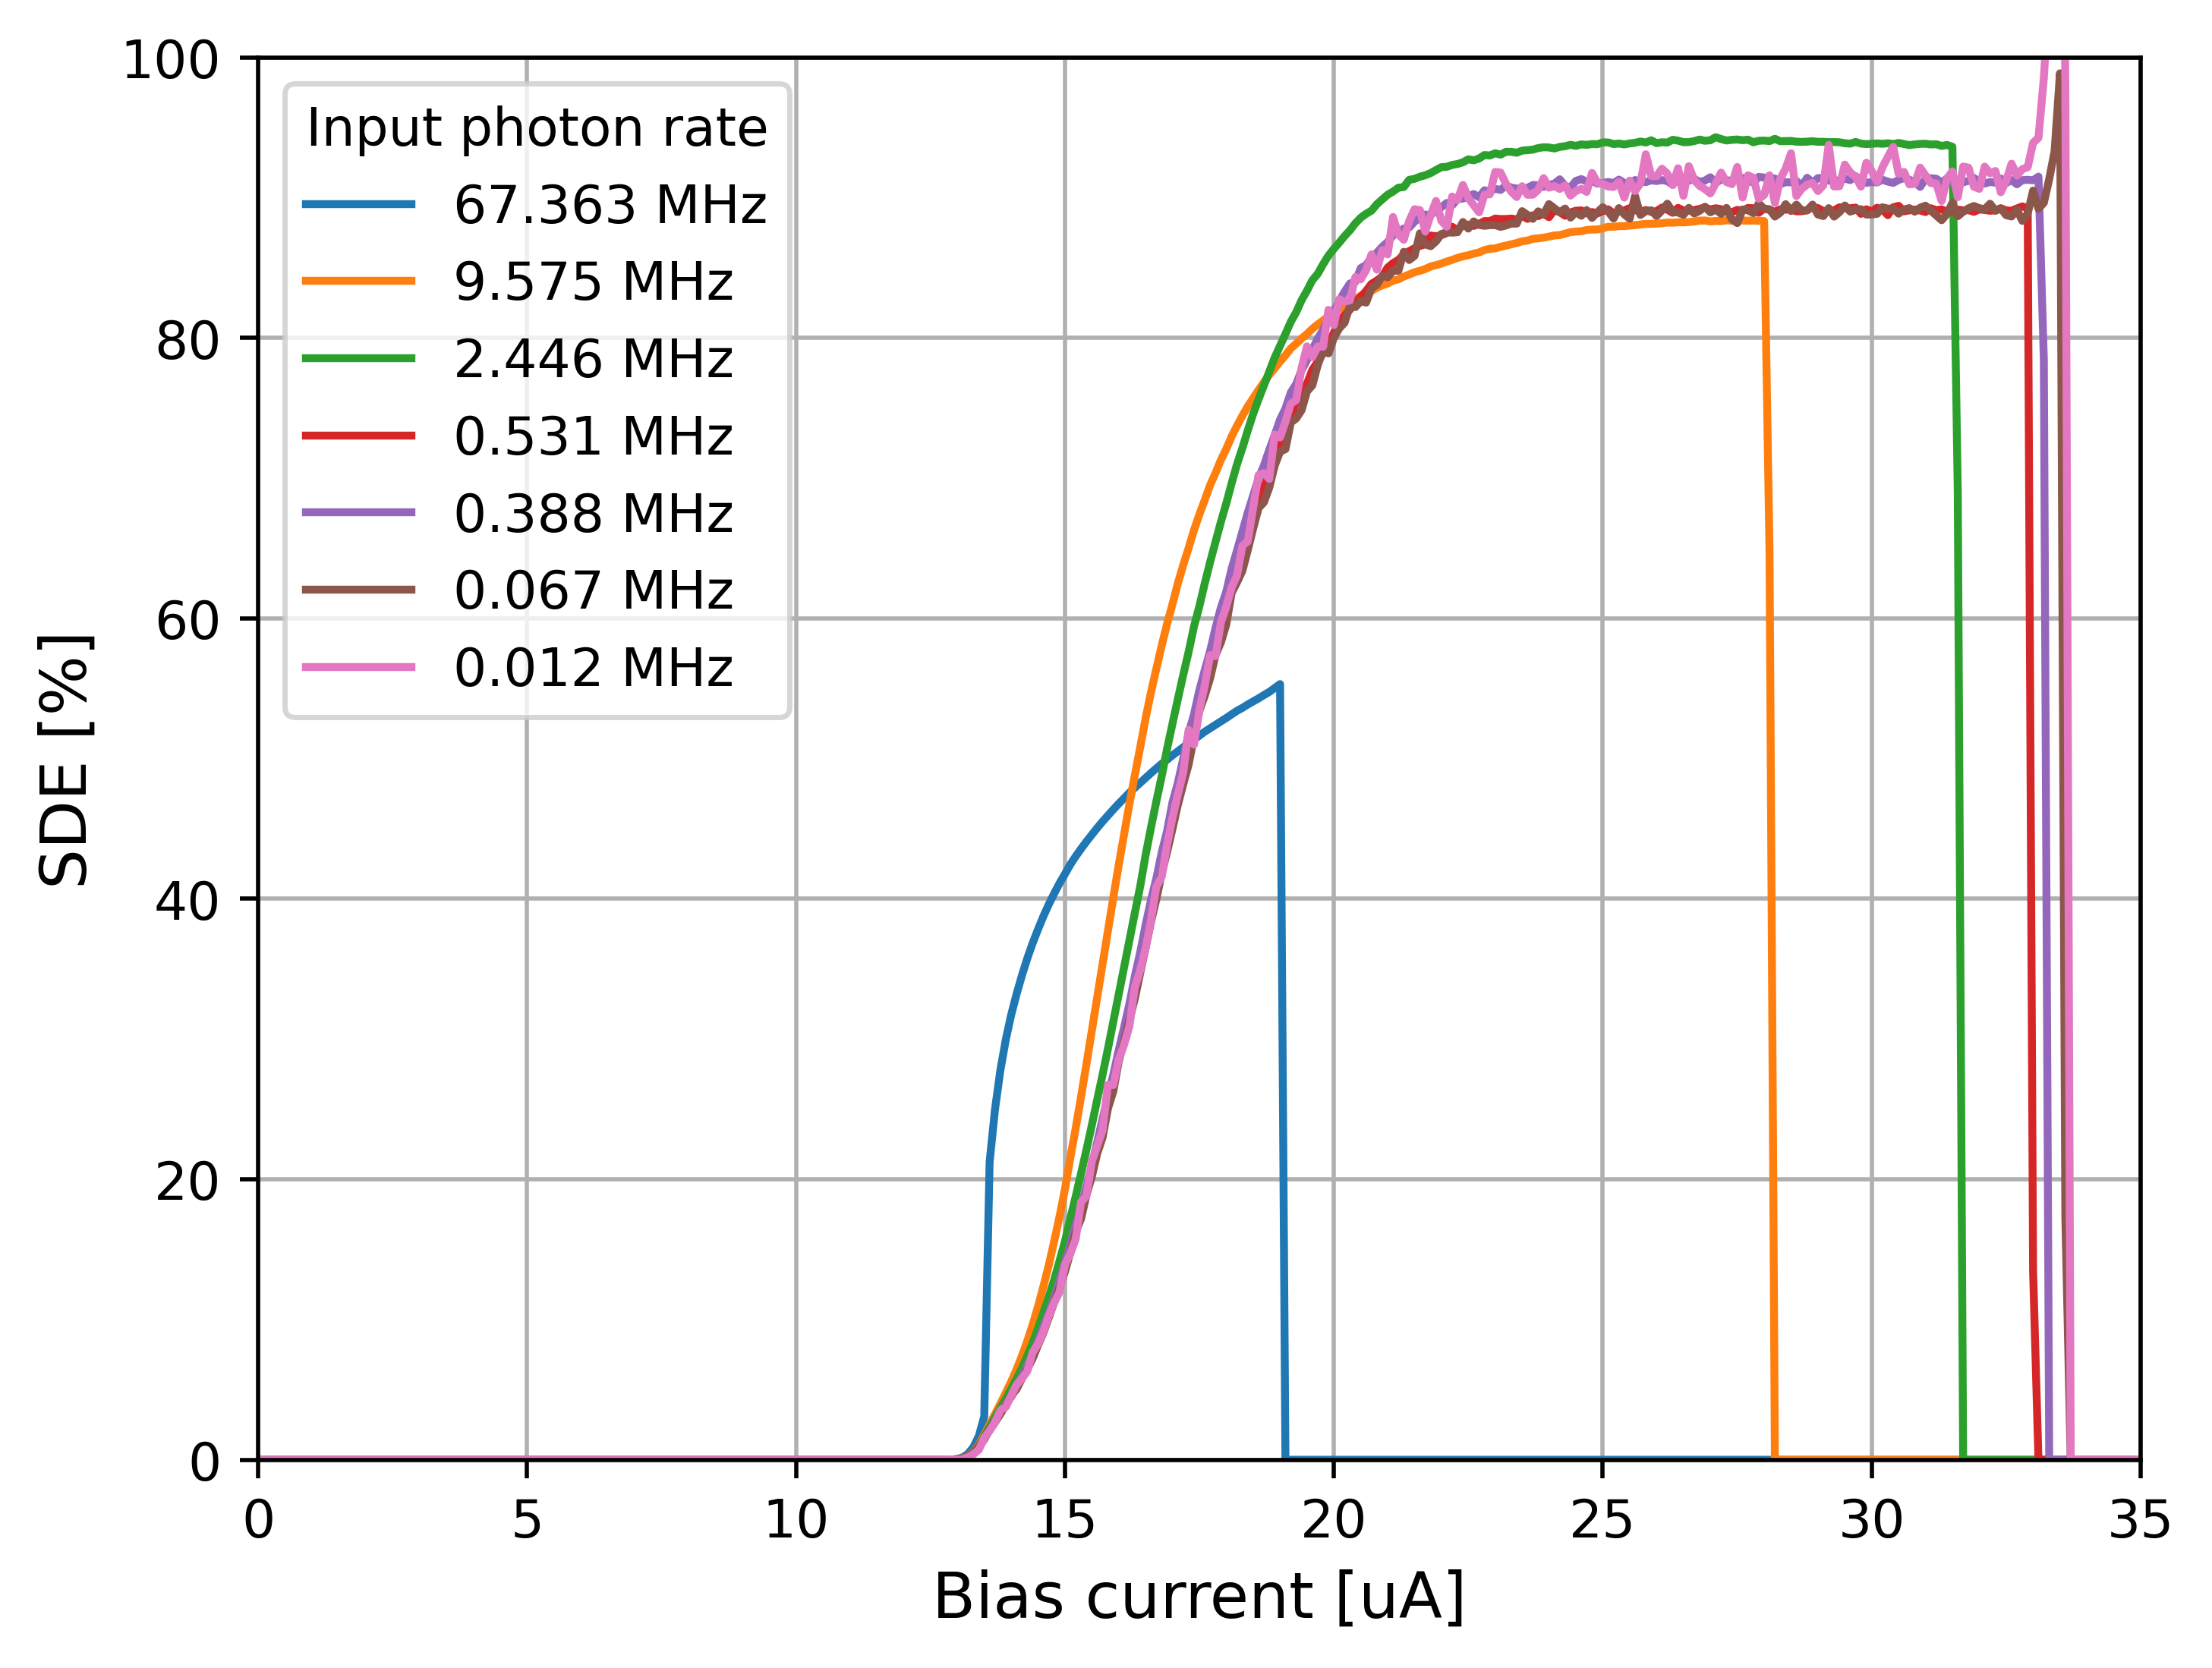

In [213]:
plt.plot(bias_sweep_7_48_600[:,0], bias_sweep_7_48_600[:,1]/photons_per_second(beam_pow_2, OD_7_48) * 100, label=f"{round(photons_per_second(beam_pow_2, OD_7_48)*10**(-6),3)} MHz" )
plt.plot(bias_sweep_8_32_600[:,0], bias_sweep_8_32_600[:,1]/photons_per_second(beam_pow_2, OD_8_32) * 100, label=f"{round(photons_per_second(beam_pow_2, OD_8_32)*10**(-6),3)} MHz" )
plt.plot(bias_sweep_8_92_600[:,0], bias_sweep_8_92_600[:,1]/photons_per_second(beam_pow_2, OD_8_92) * 100, label=f"{round(photons_per_second(beam_pow_2, OD_8_92)*10**(-6),3)} MHz" )
plt.plot(bias_sweep_9_58_600[:,0], bias_sweep_9_58_600[:,1]/photons_per_second(beam_pow_2, OD_9_58) * 100, label=f"{round(photons_per_second(beam_pow_2, OD_9_58)*10**(-6), 3)} MHz") 
plt.plot(bias_sweep_9_72_600[:,0], bias_sweep_9_72_600[:,1]/photons_per_second(beam_pow_2, OD_9_72) * 100, label=f"{round(photons_per_second(beam_pow_2, OD_9_72)*10**(-6), 3)} MHz")
plt.plot(bias_sweep_10_48_600[:,0], bias_sweep_10_48_600[:,1]/photons_per_second(beam_pow_2, OD_10_48)  * 100, label=f"{round(photons_per_second(beam_pow_2, OD_10_48)*10**(-6), 3)} MHz")
plt.plot(bias_sweep_11_22_600[:,0], bias_sweep_11_22_600[:,1]/photons_per_second(beam_pow_2, OD_11_22)  * 100, label=f"{round(photons_per_second(beam_pow_2, OD_11_22)*10**(-6), 3)} MHz")
# plt.plot(bias_sweep_12_06_600[:,0], bias_sweep_12_06_600[:,1]/photons_per_second(beam_pow_2, OD_12_06)  * 100, label=f"{round(photons_per_second(beam_pow_2, OD_12_06)*10**(-6), 4)} MHz")
# plt.axhline(y=90, color='r', linestyle='--', label='90%')
plt.xlim([0, 35])
plt.ylim([0,100])
plt.xlabel("Bias current [uA]")
plt.ylabel("SDE [%]")
plt.legend(title="Input photon rate")
save_name = "HQO_20240727_sde_bias_sweep_tv_600_thesis"
plt.grid(True)
plott_settings_default("", "Bias current [uA]", "SDE [%]", name_for_saving=save_name)
plt.show()

55.311841431301055
88.39212071403468
37.25964
8.463189999999999
[ 4.95534797  9.52884546  9.54997688  9.4479234   9.65696175 10.41570459
  5.5809648   9.14858449]


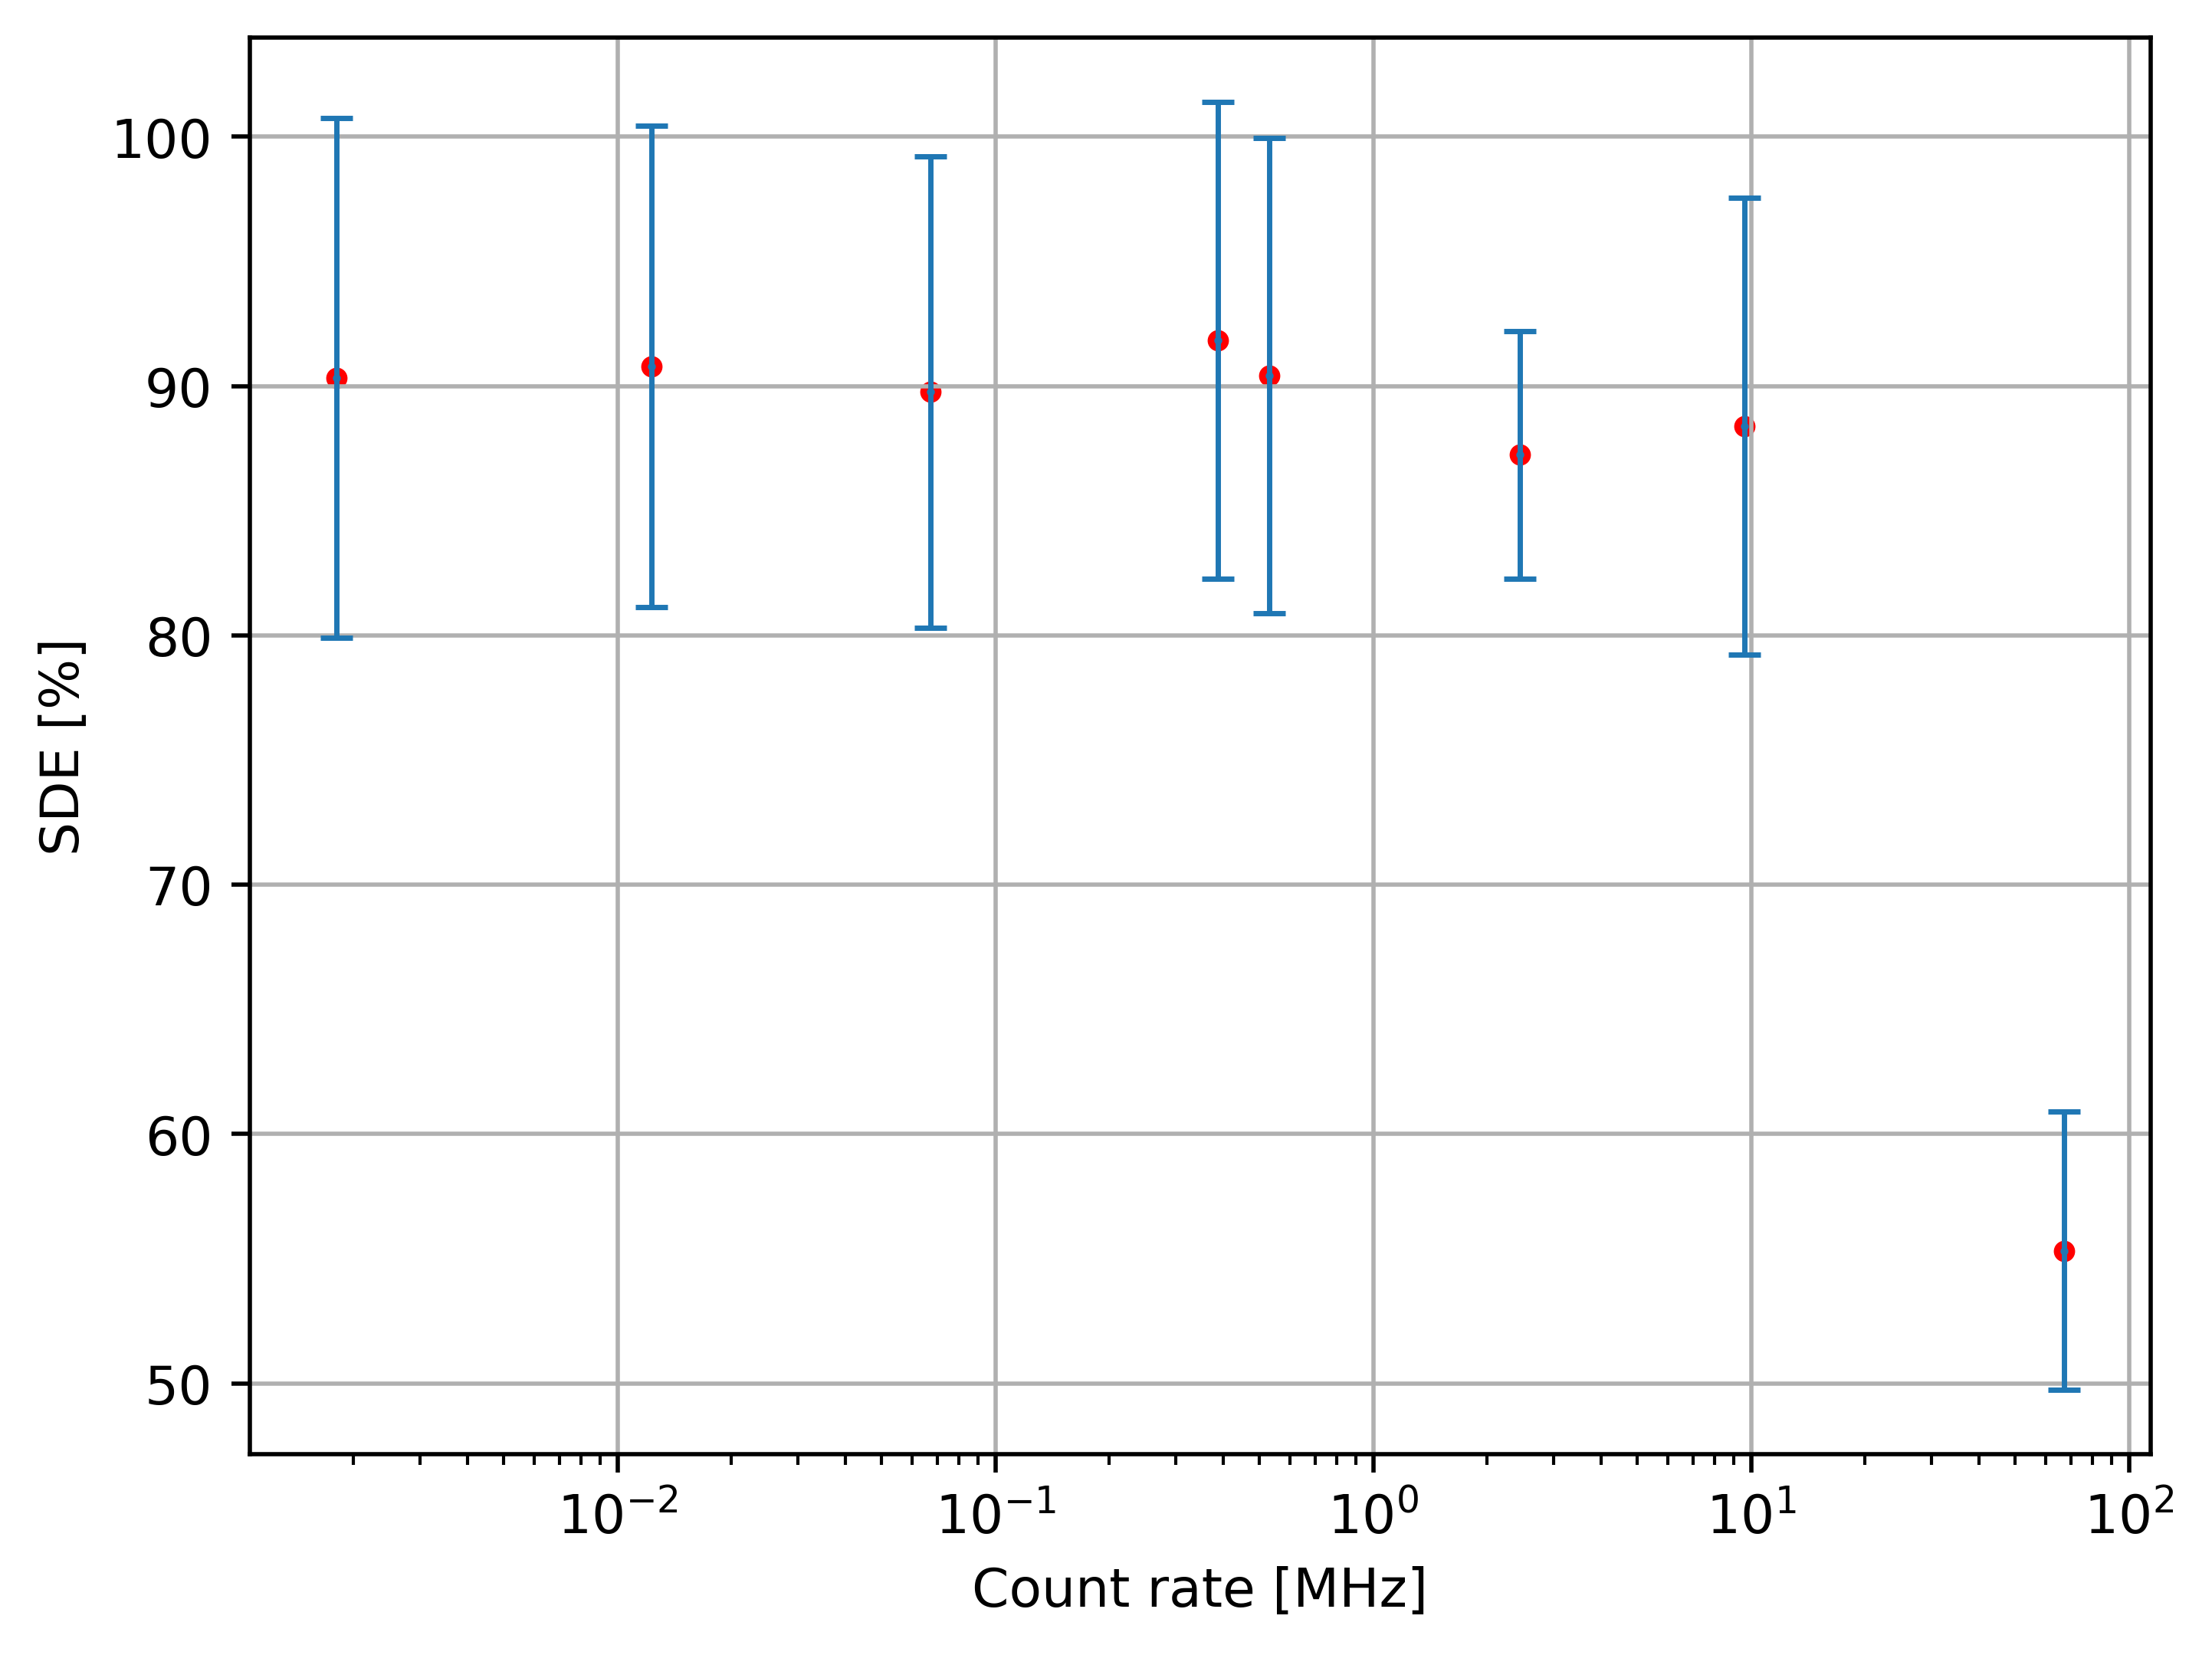

In [219]:
print(np.max(bias_sweep_7_48_600[:,1])/photons_per_second(beam_pow_2, OD_7_48) * 100)
print(np.max(bias_sweep_8_32_600[:,1])/photons_per_second(beam_pow_2, OD_8_32) * 100)

print(np.max(bias_sweep_7_48_600[:,1])*10**(-6))
print(np.max(bias_sweep_8_32_600[:,1])*10**(-6))


extended_sde_arr =  np.concatenate((mean_counts/count_rates_arr * 100, np.array([np.max(bias_sweep_7_48_600[:,1])/photons_per_second(beam_pow_2, OD_7_48) * 100, np.max(bias_sweep_8_32_600[:,1])/photons_per_second(beam_pow_2, OD_8_32) * 100])))
extended_count_rates_arr = np.concatenate((count_rates_arr, np.array([round(photons_per_second(beam_pow_2, OD_7_48) *10**(-6),4), round(photons_per_second(beam_pow_2, OD_8_32) *10**(-6),4)])))

extended_sde_error_arr = np.concatenate((sde_error_arr*100, np.array([error_function_sde(beam_pow_2, OD_7_48, delta_OD_7_48, np.max(bias_sweep_7_48_600[:,1]))*100, error_function_sde(beam_pow_2, OD_8_32, delta_OD_8_32, np.max(bias_sweep_8_32_600[:,1]))*100])))
print(extended_sde_error_arr)


plt.scatter(extended_count_rates_arr, extended_sde_arr, marker=".", color="r")
plt.errorbar(extended_count_rates_arr, extended_sde_arr, yerr=extended_sde_error_arr, fmt=".", markersize=1, capsize=3, elinewidth=1)
plt.xlabel("Count rate [MHz]")
plt.ylabel("SDE [%]")
plt.grid()
plt.xscale("log")
# plott_settings_default("", "Count rate (log) [MHz]", "SDE [%]", name_for_saving="HQO_20240727_sde_count_rate_log_thesis")'